In [1]:
from datetime import datetime, date

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

#from ydata_profiling import ProfileReport

import warnings
#warnings.filterwarnings("ignore")

In [2]:
path = 'C:/Users/santi/Desktop/TFM/'

In [3]:
df = pd.read_parquet(path + 'df_total_6m.parquet')

In [4]:
# Generate the data profiling report 
report = ProfileReport(df, title='Primer_Reporte')
report.to_file("my_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]


In [4]:
df_clientes = df.copy()

## Tratamiento de las variables:

* SUMA_CONTEO: Variable que cuenta las veces que algun cliente ha realizado una trx. En este caso, se evidencia que hay un gran porcentaje de clientes que solo han comprado 1 vez, por logica de negocio y objetivo de este estudio se descartarán estos clientes unica compra.

* TRX_ULTIMA_SEMANA, TRX_ULTIMO_MES, NUM_VECES_GANADAS: Son variables con un alto % de valores vacios, pero esto no quiere decir que sean vacios, solamente que el cliente no ha realizado transacciones y no ha ganado en el periodo estudiado, por lo cual se imputarán los vacios con un 0.

* VALOR_TOTAL, VALOR_PROM, VALOR_MEDIANO, VALOR_MIN, VALOR_MAX son variables a las cuales se les tendrá que realizar el tratamiento de datos atipicos.

* VALOR_PREMIOS: Se imputarán los vacios con 0

* FECHA_PRIMERA_APUESTA, FECHA_ULTIMA_APUESTA: Se eliminarán pues no aportan al modelo, se usaron para construir las siguientes variables:

*  DIAS_TRANSCURRIDOS_ULTIMA_APUESTA, DIAS_TRANSCURRIDOS_PRIMERA_APUESTA: Hay que hacerle un tratamiento de datos atipicos.

* DIAS_PROM_ENTRE_APUESTAS, DIAS_MEDIANOS_ENTRE_APUESTAS, DIAS_MIN_ENTRE_APUESTAS, DIAS_MAX_ENTRE_APUESTAS: Tienen algunos valores vacios, pueden ser clientes que solamente compraron una unica vez. Se probará y se verá que hacer con estos valores.

* max_valor_apuesta, min_valor_apuesta Hay que hacerle tratamientos de valores atipicos.

* dias_transcurridos_apuesta_max, dias_transcurridos_apuesta_min: Variables con comporamientos regulares

* fecha_ultima_ganancia Variables a eliminar pues se usa para construir:

* dias_transcurridos_desde_ultima_ganancia, esta variable tiene un comportamiento particular en unos dias del mes. Hay que preguntarse si este comportamiento es debido a algo 

* FECHA_ENROLAMIENTO: Como tal la fecha no sirve, podemos sacar los dias desde que se enroló.

* ANIO_NACIMIENTO, MES_NACIMIENTO: Variables con valores inusuales, esto se debe a la mala digitación de parte de las asesoras al momento de enrolar las personas. Hay que hacerle un tratamiento y sacar la edad de los clientes.

* SEXO, variable con un gran % de vacios.

* ACTIVIDAD_ECONOMICA: variable con un gran % de vacios y con mchas categorias, se eliminará.



## Feature Engineering:

In [5]:
df.head()

,CLIENTE_DOCUMENTO,SUMA_CONTEO,TRX_ULTIMA_SEMANA,TRX_ULTIMO_MES,NUM_VECES_GANADAS,VALOR_TOTAL,VALOR_PROM,VALOR_MEDIANO,VALOR_MIN,VALOR_MAX,VALOR_PREMIOS,FECHA_PRIMERA_APUESTA,FECHA_ULTIMA_APUESTA,DIAS_TRANSCURRIDOS_ULTIMA_APUESTA,DIAS_TRANSCURRIDOS_PRIMERA_APUESTA,DIAS_PROM_ENTRE_APUESTAS,DIAS_MEDIANOS_ENTRE_APUESTAS,DIAS_MIN_ENTRE_APUESTAS,DIAS_MAX_ENTRE_APUESTAS,max_valor_apuesta,dias_transcurridos_apuesta_max,min_valor_apuesta,dias_transcurridos_apuesta_min,fecha_ultima_ganancia,dias_transcurridos_desde_ultima_ganancia,FECHA_ENROLAMIENTO,ANIO_NACIMIENTO,MES_NACIMIENTO,SEXO,ACTIVIDAD_ECONOMICA
0,10000591,6,NaN,2.0,NaN,29000.0,4142.857143,5000.0,2000.0,6000.0,0,2023-06-07,2023-11-23,7,176,28.166667,0.0,0.0,105.0,6000.0,7,2000.0,176,NaT,NaN,2018-03-07,1977,01,M,EMPLEADO SECTOR PRIVADO
1,1000156468,1,NaN,1.0,NaN,5000.0,5000.000000,5000.0,5000.0,5000.0,0,2023-11-05,2023-11-05,25,25,NaN,NaN,NaN,NaN,5000.0,25,5000.0,25,NaT,NaN,2023-01-08,2000,3,F,EMPLEADO SECTOR PRIVADO
2,10024992,1,NaN,1.0,NaN,10000.0,10000.000000,10000.0,10000.0,10000.0,0,2023-11-11,2023-11-11,19,19,NaN,NaN,NaN,NaN,10000.0,19,10000.0,19,NaT,NaN,2023-12-23,None,None,None,"Arte, diseno y composicion."
3,1002542030,4,NaN,NaN,NaN,34200.0,2442.857143,350.0,200.0,10000.0,0,2023-07-26,2023-09-27,64,127,4.846154,0.0,0.0,53.0,10000.0,74,200.0,64,NaT,NaN,2017-03-17,1988,05,F,PERS. NATURAL SUBSIDIADA POR TERCEROS (AMAS DE...
4,1002542916,1,NaN,NaN,NaN,10000.0,1666.666667,1666.0,1666.0,1668.0,0,2023-07-10,2023-07-10,143,143,0.000000,0.0,0.0,0.0,1668.0,143,1666.0,143,NaT,NaN,2017-11-24,2001,08,M,EMPLEADO SECTOR PRIVADO


In [6]:
df.shape

(300871, 30)

In [7]:
df['SUMA_CONTEO'].describe()

count    300871.000000
mean         20.221115
std         112.145647
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max       23459.000000
Name: SUMA_CONTEO, dtype: float64

In [8]:
#Se eliminan clientes que han comprado menos de 5 veces
df = df[df['SUMA_CONTEO']> 5]

#Reemplazando valores nulos con 0

df['TRX_ULTIMA_SEMANA'] = df['TRX_ULTIMA_SEMANA'].fillna(0)
df['TRX_ULTIMO_MES'] = df['TRX_ULTIMO_MES'].fillna(0)
df['NUM_VECES_GANADAS'] = df['NUM_VECES_GANADAS'].fillna(0)
df['VALOR_PREMIOS'] = df['VALOR_PREMIOS'].fillna(0)

#Eliminando algunas variables:
df.drop(columns=['FECHA_PRIMERA_APUESTA', 'FECHA_PRIMERA_APUESTA',
                'ACTIVIDAD_ECONOMICA', 'fecha_ultima_ganancia'], inplace=True)

In [9]:
df.shape

(99626, 27)

In [10]:
300871-99626

201245

Se descartan 201.245 clientes

## Definición de la variable de respuesta:

#### En función a una charla con mercadeo, se define que un cliente se considera como desertor cuando ha dejado de comprar por 36 días

### Se analiza la variable de respuesta en función a su frecuencia y distribución antes de ser dicotomizada.

In [11]:
df['DIAS_TRANSCURRIDOS_ULTIMA_APUESTA'].describe()

count    99626.000000
mean        29.508853
std         36.852596
min          0.000000
25%          4.000000
50%         13.000000
75%         42.000000
max        182.000000
Name: DIAS_TRANSCURRIDOS_ULTIMA_APUESTA, dtype: float64

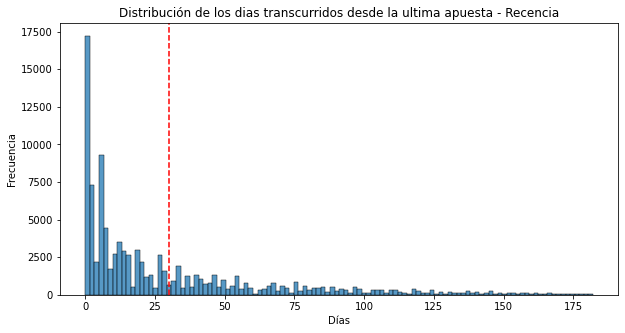

In [12]:
data_array = df['DIAS_TRANSCURRIDOS_ULTIMA_APUESTA'].to_numpy()

# Utilizando el arreglo numpy en el histplot
plt.figure(figsize=(10, 5))
sns.histplot(data_array)  # 'kde' agrega la línea de densidad
plt.axvline(x=30, color='red', linestyle='--', label='Día 30')

# Agregando títulos y etiquetas
plt.title('Distribución de los dias transcurridos desde la ultima apuesta - Recencia')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
df['variable_respuesta'] = np.where(df['DIAS_TRANSCURRIDOS_ULTIMA_APUESTA'] > 30, 1, 0)

df['variable_respuesta'].value_counts()

variable_respuesta
0    67381
1    32245
Name: count, dtype: int64

In [14]:
df['DIAS_TRANSCURRIDOS_ULTIMA_APUESTA'].describe()

count    99626.000000
mean        29.508853
std         36.852596
min          0.000000
25%          4.000000
50%         13.000000
75%         42.000000
max        182.000000
Name: DIAS_TRANSCURRIDOS_ULTIMA_APUESTA, dtype: float64

In [15]:
31739/99626

0.3185814947905165

In [16]:
df_clientes = df.copy()

## Crear la variable edad

In [17]:
df_clientes['ANIO_NACIMIENTO2'] = pd.to_numeric(df_clientes['ANIO_NACIMIENTO'],errors='coerce').astype('Int64')
df_clientes['MES_NACIMIENTO2'] = pd.to_numeric(df_clientes['MES_NACIMIENTO'],errors='coerce').astype('Int64')

df_clientes[(df_clientes['ANIO_NACIMIENTO2']>9) & (df_clientes['ANIO_NACIMIENTO2']<100)]['ANIO_NACIMIENTO2'].unique()

<IntegerArray>
[19, 15, 36, 10, 28, 18, 21, 32, 31, 14, 33, 20, 16, 11, 13, 25, 30, 12, 24,
 26, 22, 17, 27, 35, 34]
Length: 25, dtype: Int64

* descartar menores de edad nacidos mayor a 2007 , osea que quienes tenga 0 al 07 asignar 200, para que sean 2000, 2001, ..., 2007
* Del anio 30 hacia adelante asigna 19, desde el 30 hasta el 99


In [18]:
df_clientes['ANIO_NACIMIENTO_MOD'] = df_clientes['ANIO_NACIMIENTO2']

df_clientes['ANIO_NACIMIENTO_MOD'].fillna(9999, inplace=True)

df_clientes['ANIO_NACIMIENTO_MOD']  = np.where(
    (df_clientes['ANIO_NACIMIENTO_MOD'] >= 0) & (df_clientes['ANIO_NACIMIENTO_MOD'] <= 9),
    '200' + df_clientes['ANIO_NACIMIENTO_MOD'].astype(str),
    df_clientes['ANIO_NACIMIENTO_MOD'].astype(str)
)


df_clientes['ANIO_NACIMIENTO_MOD'] = pd.to_numeric(df_clientes['ANIO_NACIMIENTO_MOD'],errors='coerce').astype('Int64')


df_clientes['ANIO_NACIMIENTO_MOD']  = np.where(
    (df_clientes['ANIO_NACIMIENTO_MOD'] >= 30) & (df_clientes['ANIO_NACIMIENTO_MOD'] <= 99),
    '19' + df_clientes['ANIO_NACIMIENTO_MOD'].astype(str),
    df_clientes['ANIO_NACIMIENTO_MOD'].astype(str)
)

df_clientes['ANIO_NACIMIENTO_MOD'] = pd.to_numeric(df_clientes['ANIO_NACIMIENTO_MOD'],errors='coerce').astype('Int64')


df_clientes[(df_clientes['ANIO_NACIMIENTO2']>=0) & (df_clientes['ANIO_NACIMIENTO2']<=9)]['ANIO_NACIMIENTO_MOD'].unique()

df_clientes[(df_clientes['ANIO_NACIMIENTO2']>=30) & (df_clientes['ANIO_NACIMIENTO2']<=99)]['ANIO_NACIMIENTO_MOD'].unique()

<IntegerArray>
[1936, 1932, 1931, 1933, 1930, 1935, 1934]
Length: 7, dtype: Int64

In [19]:
df_clientes['ANIO_NACIMIENTO_MOD']  = np.where(
    (df_clientes['ANIO_NACIMIENTO_MOD'] > 2006),
    '8888',
    df_clientes['ANIO_NACIMIENTO_MOD'].astype(str)
)

df_clientes['ANIO_NACIMIENTO_MOD'] = pd.to_numeric(df_clientes['ANIO_NACIMIENTO_MOD'],errors='coerce').astype('Int64')

df_clientes['ANIO_NACIMIENTO_MOD']  = np.where(
    (df_clientes['ANIO_NACIMIENTO_MOD'] <= 1900),
    '8888',
    df_clientes['ANIO_NACIMIENTO_MOD'].astype(str)
)

df_clientes['ANIO_NACIMIENTO_MOD'] = pd.to_numeric(df_clientes['ANIO_NACIMIENTO_MOD'],errors='coerce').astype('Int64')

df_clientes[df_clientes['ANIO_NACIMIENTO_MOD']<8888]['ANIO_NACIMIENTO_MOD'].describe()

df_clientes['edad']= 2024 - df_clientes['ANIO_NACIMIENTO_MOD']

df_clientes.loc[df_clientes['ANIO_NACIMIENTO_MOD'].isin([9999, 8888]), 'edad'] = np.nan

bins = [18, 25, 40, 59, float('inf')]  # float('inf') para incluir todos los valores por encima de 59
labels = ['18-25 Jóvenes', '26-40 Adultos jóvenes', '41-59 Adultos', '60 o mas Mayores']

# Categorizar 'edad' en rangos
df_clientes['categoria_edad'] = pd.cut(df_clientes['edad'], bins=bins, labels=labels, right=False)

# Categorizar 'edad' en rangos
df_clientes['categoria_edad'] = pd.cut(df_clientes['edad'], bins=bins, labels=labels, right=False)

rango_edades = df_clientes['categoria_edad'].value_counts(normalize = True).sort_index()
rango_edades

categoria_edad
18-25 Jóvenes            0.011884
26-40 Adultos jóvenes    0.122834
41-59 Adultos            0.385663
60 o mas Mayores         0.479618
Name: proportion, dtype: float64

In [20]:
#Eliminando algunas variables:
df_clientes.drop(columns=['ANIO_NACIMIENTO2'   , 'MES_NACIMIENTO2',
                          'ANIO_NACIMIENTO_MOD', 'edad', 
                          'ANIO_NACIMIENTO'    , 'MES_NACIMIENTO'], inplace=True)

In [21]:
#plt.figure(figsize=(7, 5))  # Ajusta el tamaño del gráfico según tus necesidades
#sns.boxplot(x='edad', data=df_clientes, color='#720026')
#plt.title('Boxplot de edad de los clientes')

Las variables FECHA_ENROLAMIENTO y SEXO se eliminarán por el gran % de valores faltantes.

La variable dias_transcurridos_desde_ultima_ganancia tiene un gran % de valores vacios, pero no es porque sean vacios si no porque hay clientes que no han ganado. En este caso, es mejor solo quedarse con la variable si el cliente ha ganado o no. Y eliminar esta de dias transcurridos

In [22]:
df_clientes['CLIENTE_GANO'] = np.where(df_clientes['VALOR_PREMIOS'] != 0, 1,0)

df_clientes.drop(columns=['dias_transcurridos_desde_ultima_ganancia', 
                          'FECHA_ULTIMA_APUESTA',
                          'FECHA_ENROLAMIENTO',
                          'CLIENTE_DOCUMENTO',
                          'DIAS_TRANSCURRIDOS_ULTIMA_APUESTA'], inplace=True)

In [23]:
# Contar valores nulos por columna
null_counts = df_clientes.isnull().sum()

# Calcular el total de valores por columna
total_counts = df_clientes.count()

# Crear DataFrame para mostrar los resultados
summary_df = pd.DataFrame({'Valores Nulos': null_counts, 'Valores Totales': total_counts,
                          '% Faltaltes': (null_counts/total_counts)})
summary_df['% Faltaltes'] = summary_df['% Faltaltes'].map(lambda x: '{:.2%}'.format(x))

summary_df

,Valores Nulos,Valores Totales,% Faltaltes
SUMA_CONTEO,0,99626,0.00%
TRX_ULTIMA_SEMANA,0,99626,0.00%
TRX_ULTIMO_MES,0,99626,0.00%
NUM_VECES_GANADAS,0,99626,0.00%
VALOR_TOTAL,0,99626,0.00%
VALOR_PROM,0,99626,0.00%
VALOR_MEDIANO,0,99626,0.00%
VALOR_MIN,0,99626,0.00%
VALOR_MAX,0,99626,0.00%
VALOR_PREMIOS,0,99626,0.00%


### Me quedaré con los clientes que tengan información de sexo y categoria edad, pues son clientes correctamente enrolados, los otros clientes no son objetivo de estudio, pues las campañas comerciales serian para personas con minimo la información basica

In [24]:
df_clientes_sub = df_clientes[df_clientes['SEXO'].notnull()]
df_clientes_sub = df_clientes_sub[df_clientes_sub['categoria_edad'].notnull()]

In [25]:
# Contar valores nulos por columna
null_counts = df_clientes_sub.isnull().sum()

# Calcular el total de valores por columna
total_counts = df_clientes_sub.count()

# Crear DataFrame para mostrar los resultados
summary_df = pd.DataFrame({'Valores Nulos': null_counts, 'Valores Totales': total_counts,
                          '% Faltaltes': (null_counts/total_counts)})

summary_df['% Faltaltes'] = summary_df['% Faltaltes'].map(lambda x: '{:.2%}'.format(x))

summary_df

,Valores Nulos,Valores Totales,% Faltaltes
SUMA_CONTEO,0,64265,0.00%
TRX_ULTIMA_SEMANA,0,64265,0.00%
TRX_ULTIMO_MES,0,64265,0.00%
NUM_VECES_GANADAS,0,64265,0.00%
VALOR_TOTAL,0,64265,0.00%
VALOR_PROM,0,64265,0.00%
VALOR_MEDIANO,0,64265,0.00%
VALOR_MIN,0,64265,0.00%
VALOR_MAX,0,64265,0.00%
VALOR_PREMIOS,0,64265,0.00%


In [26]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

cuants_vars = df_clientes_sub.select_dtypes(include = numerics).columns

cuants_vars = cuants_vars.to_numpy().tolist()

# creating a list for delet bool cols
bool_cols =['CLIENTE_GANO',
            'variable_respuesta']
 
for l in bool_cols:
    cuants_vars.remove(l)
    
cuants_vars

['SUMA_CONTEO',
 'TRX_ULTIMA_SEMANA',
 'TRX_ULTIMO_MES',
 'NUM_VECES_GANADAS',
 'VALOR_TOTAL',
 'VALOR_PROM',
 'VALOR_MEDIANO',
 'VALOR_MIN',
 'VALOR_MAX',
 'VALOR_PREMIOS',
 'DIAS_TRANSCURRIDOS_PRIMERA_APUESTA',
 'DIAS_PROM_ENTRE_APUESTAS',
 'DIAS_MEDIANOS_ENTRE_APUESTAS',
 'DIAS_MIN_ENTRE_APUESTAS',
 'DIAS_MAX_ENTRE_APUESTAS',
 'max_valor_apuesta',
 'dias_transcurridos_apuesta_max',
 'min_valor_apuesta',
 'dias_transcurridos_apuesta_min']

In [27]:
target = 'variable_respuesta'

cuali_vars = df_clientes_sub.drop(columns = cuants_vars + [target]).columns

cuali_vars

Index(['SEXO', 'categoria_edad', 'CLIENTE_GANO'], dtype='object')

##### Verificamos que esten todas las variables entre la clasificación realizada

In [28]:
len(cuali_vars) + len(cuants_vars) + 1 == df_clientes_sub.shape[1]

True

In [29]:
df = df_clientes_sub.copy()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, 'SUMA_CONTEO'),
  Text(0, 1.5, 'TRX_ULTIMA_SEMANA'),
  Text(0, 2.5, 'TRX_ULTIMO_MES'),
  Text(0, 3.5, 'NUM_VECES_GANADAS'),
  Text(0, 4.5, 'VALOR_TOTAL'),
  Text(0, 5.5, 'VALOR_PROM'),
  Text(0, 6.5, 'VALOR_MEDIANO'),
  Text(0, 7.5, 'VALOR_MIN'),
  Text(0, 8.5, 'VALOR_MAX'),
  Text(0, 9.5, 'VALOR_PREMIOS'),
  Text(0, 10.5, 'DIAS_TRANSCURRIDOS_PRIMERA_APUESTA'),
  Text(0, 11.5, 'DIAS_PROM_ENTRE_APUESTAS'),
  Text(0, 12.5, 'DIAS_MEDIANOS_ENTRE_APUESTAS'),
  Text(0, 13.5, 'DIAS_MIN_ENTRE_APUESTAS'),
  Text(0, 14.5, 'DIAS_MAX_ENTRE_APUESTAS'),
  Text(0, 15.5, 'max_valor_apuesta'),
  Text(0, 16.5, 'dias_transcurridos_apuesta_max'),
  Text(0, 17.5, 'min_valor_apuesta'),
  Text(0, 18.5, 'dias_transcurridos_apuesta_min')])

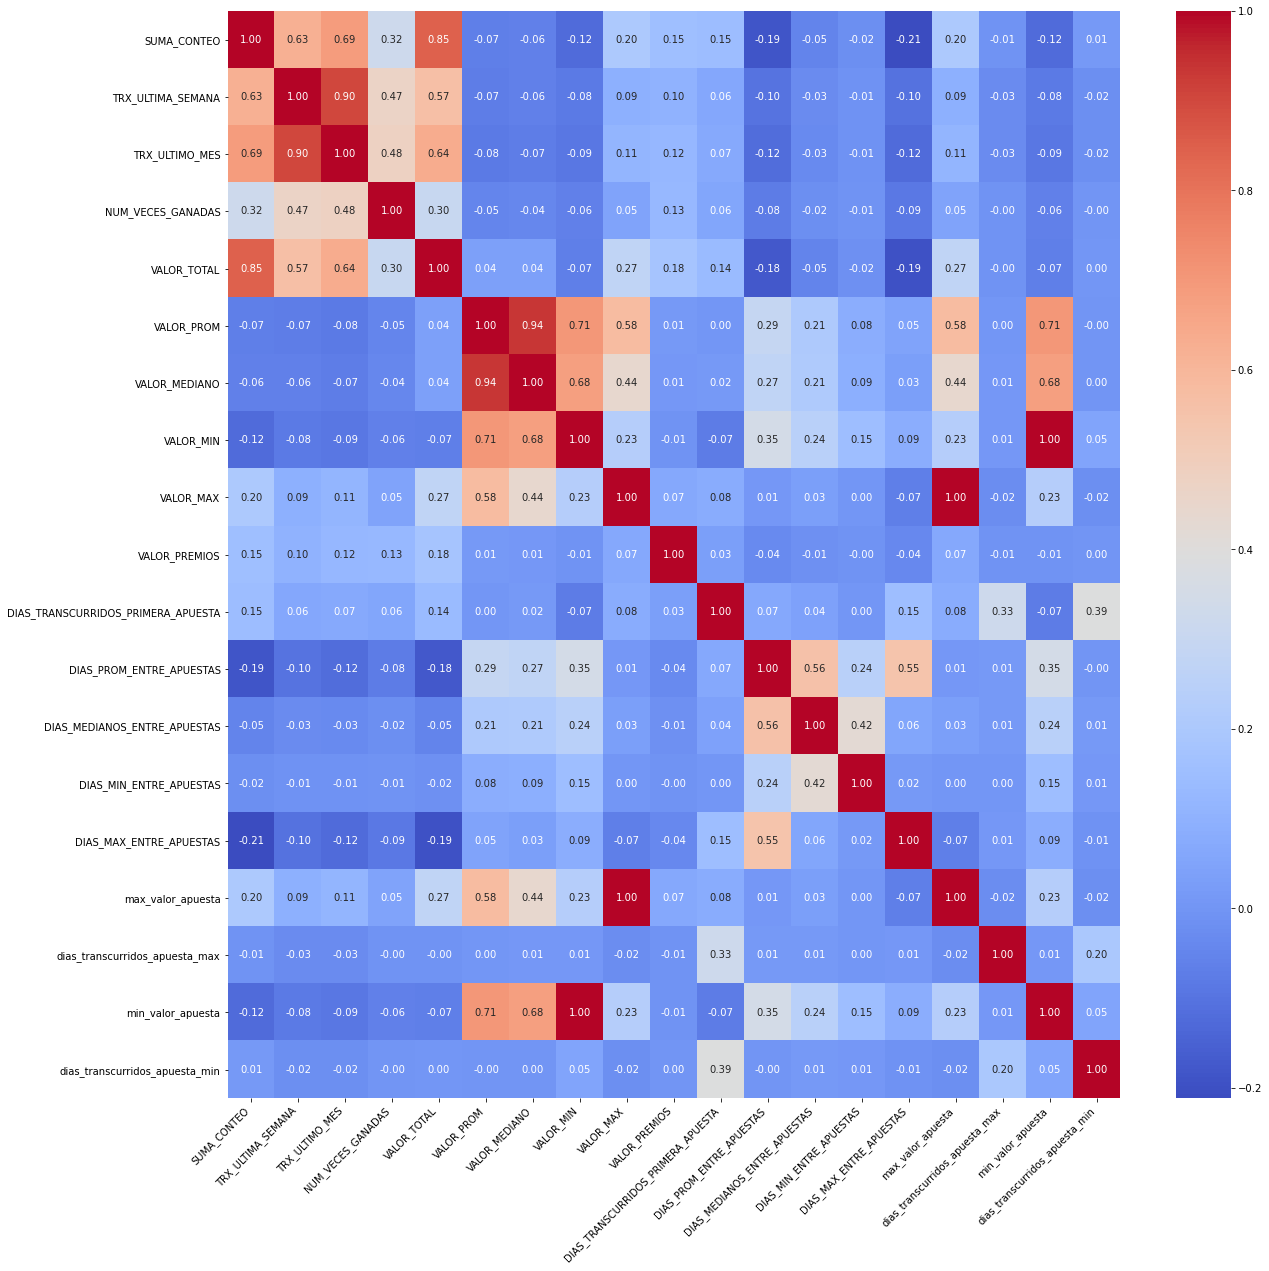

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))  # Ajusta el tamaño según sea necesario

# Genera el heatmap con un tamaño de anotación mayor
sns.heatmap(df[cuants_vars].corr(method='spearman'), annot=True, fmt=".2f", ax=ax, annot_kws={'size': 10}, cmap='coolwarm')

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas y las alinea a la derecha para mejor legibilidad
plt.yticks(rotation=0)  # Mantiene las etiquetas del eje y verticales


In [30]:
correlation_matrix = df[cuants_vars].corr(method='spearman')

# Extraer las variables correlacionadas mayor a 0.60
high_correlation = correlation_matrix[correlation_matrix > 0.6]
high_correlation = high_correlation[high_correlation < 1.0].dropna(how='all', axis=1).dropna(how='all', axis=0)

# Convertir las correlaciones a lista
high_correlation_list = high_correlation.stack().index.tolist()

print("Variables con correlación mayor a 0.60:")

Variables con correlación mayor a 0.60:


In [31]:
high_correlation_list

[('SUMA_CONTEO', 'TRX_ULTIMA_SEMANA'),
 ('SUMA_CONTEO', 'TRX_ULTIMO_MES'),
 ('SUMA_CONTEO', 'VALOR_TOTAL'),
 ('TRX_ULTIMA_SEMANA', 'SUMA_CONTEO'),
 ('TRX_ULTIMA_SEMANA', 'TRX_ULTIMO_MES'),
 ('TRX_ULTIMO_MES', 'SUMA_CONTEO'),
 ('TRX_ULTIMO_MES', 'TRX_ULTIMA_SEMANA'),
 ('TRX_ULTIMO_MES', 'VALOR_TOTAL'),
 ('VALOR_TOTAL', 'SUMA_CONTEO'),
 ('VALOR_TOTAL', 'TRX_ULTIMO_MES'),
 ('VALOR_PROM', 'VALOR_MEDIANO'),
 ('VALOR_PROM', 'VALOR_MIN'),
 ('VALOR_PROM', 'min_valor_apuesta'),
 ('VALOR_MEDIANO', 'VALOR_PROM'),
 ('VALOR_MEDIANO', 'VALOR_MIN'),
 ('VALOR_MEDIANO', 'min_valor_apuesta'),
 ('VALOR_MIN', 'VALOR_PROM'),
 ('VALOR_MIN', 'VALOR_MEDIANO'),
 ('min_valor_apuesta', 'VALOR_PROM'),
 ('min_valor_apuesta', 'VALOR_MEDIANO')]

In [32]:
# Almacenar las variables eliminadas
variables_eliminadas = []

# Eliminar una de las variables correlacionadas del DataFrame
for var1, var2 in high_correlation_list:
    if var1 in df.columns and var2 in df.columns:
        # Eliminar la variable que tenga mayor índice de la lista
        if df.columns.get_loc(var1) > df.columns.get_loc(var2):
            variables_eliminadas.append(var1)
            df.drop(columns=[var1], inplace=True)
        else:
            variables_eliminadas.append(var2)
            df.drop(columns=[var2], inplace=True)

In [33]:
print('Se eliminaron las variables')
    
print(variables_eliminadas)
    
print('Por alta correlacion')

Se eliminaron las variables
['TRX_ULTIMA_SEMANA', 'TRX_ULTIMO_MES', 'VALOR_TOTAL', 'VALOR_MEDIANO', 'VALOR_MIN', 'min_valor_apuesta']
Por alta correlacion


In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

cuants_vars = df.select_dtypes(include = numerics).columns

cuants_vars = cuants_vars.to_numpy().tolist()

# creating a list for delet bool cols
bool_cols =['CLIENTE_GANO']
 
for l in bool_cols:
    cuants_vars.remove(l)

<AxesSubplot:>

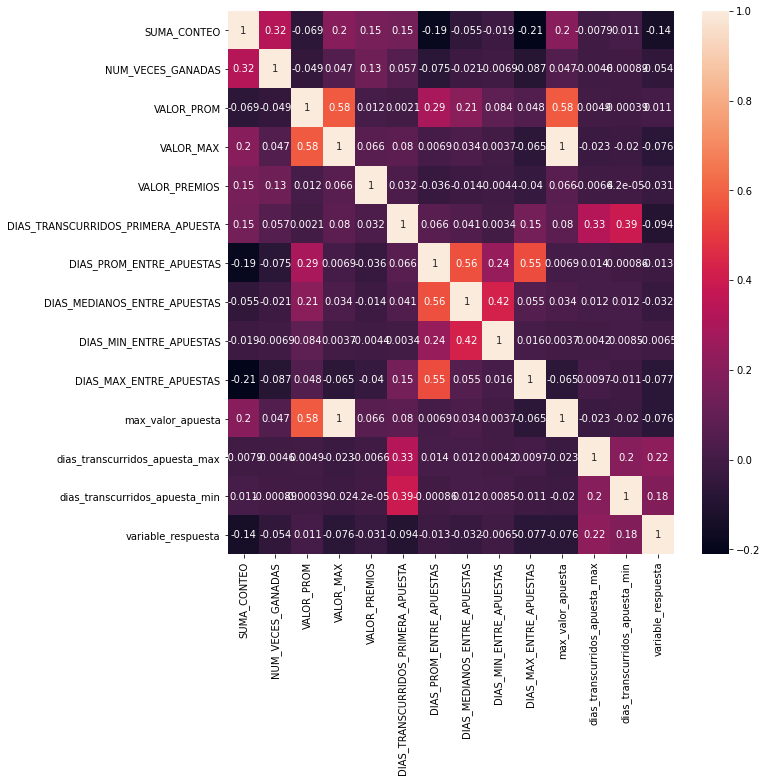

In [35]:
#Ahora veamos las correlaciones de las variables.
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df[cuants_vars].corr(method='spearman'), annot = True, ax = ax) 

In [35]:
len(cuali_vars) + len(cuants_vars) == df.shape[1]

True

In [36]:
cuants_vars

['SUMA_CONTEO',
 'NUM_VECES_GANADAS',
 'VALOR_PROM',
 'VALOR_MAX',
 'VALOR_PREMIOS',
 'DIAS_TRANSCURRIDOS_PRIMERA_APUESTA',
 'DIAS_PROM_ENTRE_APUESTAS',
 'DIAS_MEDIANOS_ENTRE_APUESTAS',
 'DIAS_MIN_ENTRE_APUESTAS',
 'DIAS_MAX_ENTRE_APUESTAS',
 'max_valor_apuesta',
 'dias_transcurridos_apuesta_max',
 'dias_transcurridos_apuesta_min',
 'variable_respuesta']

In [37]:
# Calcular la correlación entre la variable de respuesta y las variables predictoras
correlation_with_target = df[cuants_vars].corr(method='spearman')['variable_respuesta'].drop('variable_respuesta')

correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

print("Correlación entre la variable de respuesta y las variables predictoras:")
print(correlation_with_target_sorted)

Correlación entre la variable de respuesta y las variables predictoras:
dias_transcurridos_apuesta_max        0.212988
dias_transcurridos_apuesta_min        0.169121
DIAS_PROM_ENTRE_APUESTAS              0.013343
VALOR_PROM                            0.004920
DIAS_MIN_ENTRE_APUESTAS              -0.004493
DIAS_MEDIANOS_ENTRE_APUESTAS         -0.054556
DIAS_MAX_ENTRE_APUESTAS              -0.059308
VALOR_MAX                            -0.104742
max_valor_apuesta                    -0.104742
VALOR_PREMIOS                        -0.130102
NUM_VECES_GANADAS                    -0.130333
DIAS_TRANSCURRIDOS_PRIMERA_APUESTA   -0.177302
SUMA_CONTEO                          -0.393512
Name: variable_respuesta, dtype: float64


In [38]:
df['CLIENTE_GANO'].value_counts()

CLIENTE_GANO
0    59746
1     4519
Name: count, dtype: int64

In [39]:
from scipy.stats import chi2_contingency

### Test chi cuadrado para ver correlacion entre la variable de respuesta y las variables categoricas

In [40]:
cuali_vars

Index(['SEXO', 'categoria_edad', 'CLIENTE_GANO'], dtype='object')

In [41]:
variables_categoricas = cuali_vars

# Bucle para calcular el test de Chi-cuadrado para cada variable categórica
resultados = []
for categoria in variables_categoricas:
    tabla_contingencia = pd.crosstab(df['variable_respuesta'], df[categoria])
    chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)
    resultados.append({
        'Variable Categorica': categoria,
        'Chi-cuadrado': chi2,
        'p-value': p_value,
        'Grados de libertad': dof
    })

In [42]:
# Convertir los resultados en un DataFrame para una mejor visualización
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

  Variable Categorica  Chi-cuadrado        p-value  Grados de libertad
0                SEXO    261.354875   8.693378e-59                   1
1      categoria_edad    590.231163  1.321650e-127                   3
2        CLIENTE_GANO   1079.764704  8.259390e-237                   1


## Manejo de clientes atipicos

In [43]:
# np.arange(0,  1 + 0.01 , 0.01)
df[cuants_vars].quantile(np.arange(0.9,  1 + 0.01, 0.01))

,SUMA_CONTEO,NUM_VECES_GANADAS,VALOR_PROM,VALOR_MAX,VALOR_PREMIOS,DIAS_TRANSCURRIDOS_PRIMERA_APUESTA,DIAS_PROM_ENTRE_APUESTAS,DIAS_MEDIANOS_ENTRE_APUESTAS,DIAS_MIN_ENTRE_APUESTAS,DIAS_MAX_ENTRE_APUESTAS,max_valor_apuesta,dias_transcurridos_apuesta_max,dias_transcurridos_apuesta_min,variable_respuesta
0.90,106.00,0.0,2769.230769,6000.0,0.00,181.0,10.923077,1.0,0.0,81.0,6000.0,169.0,172.0,1.0
0.91,117.00,0.0,2906.386364,7000.0,0.00,181.0,11.500000,1.0,0.0,84.0,7000.0,170.0,173.0,1.0
0.92,131.00,0.0,3050.000000,8000.0,0.00,182.0,12.132333,2.0,0.0,86.0,8000.0,173.0,174.0,1.0
0.93,148.00,1.0,3250.000000,10000.0,2100.00,182.0,12.857143,3.0,0.0,90.0,10000.0,174.0,176.0,1.0
0.94,169.00,1.0,3465.019608,10000.0,26250.00,182.0,13.666667,3.0,0.0,93.0,10000.0,175.0,177.0,1.0
0.95,199.00,1.0,3719.835616,10000.0,69720.00,182.0,14.636364,4.0,0.0,98.0,10000.0,176.0,178.0,1.0
0.96,237.44,1.0,4064.348993,10000.0,165766.00,182.0,15.777778,6.0,0.0,102.0,10000.0,178.0,179.0,1.0
0.97,296.08,1.0,4500.000000,11000.0,252000.00,182.0,17.400000,7.0,0.0,108.0,11000.0,180.0,180.0,1.0
0.98,392.00,2.0,5000.000000,12500.0,402389.12,182.0,19.500000,9.0,0.0,118.0,12500.0,180.0,181.0,1.0
0.99,615.36,3.0,6154.097902,20000.0,756504.00,182.0,22.857143,14.0,1.0,131.0,20000.0,181.0,182.0,1.0


### Percentil superior

In [44]:
percent_sup_trunc = {'SUMA_CONTEO' : 0.98, 
                     'NUM_VECES_GANADAS' : 0.99,
                     'VALOR_PROM' : 0.99,
                     'VALOR_MAX' : 0.99,
                     'VALOR_PREMIOS': 0.98,
                     'DIAS_MEDIANOS_ENTRE_APUESTAS': 0.99,
                     'max_valor_apuesta': 0.99
                    }

percent_sup_trunc.items()

dict_items([('SUMA_CONTEO', 0.98), ('NUM_VECES_GANADAS', 0.99), ('VALOR_PROM', 0.99), ('VALOR_MAX', 0.99), ('VALOR_PREMIOS', 0.98), ('DIAS_MEDIANOS_ENTRE_APUESTAS', 0.99), ('max_valor_apuesta', 0.99)])

In [45]:
# Creamos el for, donde x es la variable y p el quiantile. Se le agrega la condicion de truncar cuando sea superior a el limite definido en el diccionario

for x,p in percent_sup_trunc.items():
    
    print(x,p)
    limit = df[x].quantile(p)
    df[x] = np.where(df[x] > limit, limit, df[x])

SUMA_CONTEO 0.98
NUM_VECES_GANADAS 0.99
VALOR_PROM 0.99
VALOR_MAX 0.99
VALOR_PREMIOS 0.98
DIAS_MEDIANOS_ENTRE_APUESTAS 0.99
max_valor_apuesta 0.99


### Percentil inferior

In [46]:
df[cuants_vars].quantile(np.arange(0,  0.1 + 0.01, 0.01))

,SUMA_CONTEO,NUM_VECES_GANADAS,VALOR_PROM,VALOR_MAX,VALOR_PREMIOS,DIAS_TRANSCURRIDOS_PRIMERA_APUESTA,DIAS_PROM_ENTRE_APUESTAS,DIAS_MEDIANOS_ENTRE_APUESTAS,DIAS_MIN_ENTRE_APUESTAS,DIAS_MAX_ENTRE_APUESTAS,max_valor_apuesta,dias_transcurridos_apuesta_max,dias_transcurridos_apuesta_min,variable_respuesta
0.00,6.0,0.0,17.003427,50.0000,0.0,0.0,0.000000,0.0,0.0,0.0,50.0000,0.0,0.0,0.0
0.01,6.0,0.0,160.646617,429.0896,0.0,27.0,0.000000,0.0,0.0,0.0,429.0896,1.0,2.0,0.0
0.02,6.0,0.0,217.050109,500.0000,0.0,46.0,0.000000,0.0,0.0,0.0,500.0000,3.0,5.0,0.0
0.03,6.0,0.0,259.113343,500.0000,0.0,57.0,0.023934,0.0,0.0,2.0,500.0000,5.0,7.0,0.0
0.04,6.0,0.0,297.546012,500.0000,0.0,69.0,0.065280,0.0,0.0,4.0,500.0000,7.0,10.0,0.0
0.05,6.0,0.0,329.166583,517.2000,0.0,78.0,0.104732,0.0,0.0,5.0,517.2000,10.0,12.0,0.0
0.06,6.0,0.0,361.702128,648.8800,0.0,85.0,0.142515,0.0,0.0,6.0,648.8800,12.0,14.0,0.0
0.07,6.0,0.0,392.813905,800.0000,0.0,92.0,0.179998,0.0,0.0,7.0,800.0000,15.0,17.0,0.0
0.08,6.0,0.0,418.993725,1000.0000,0.0,97.0,0.220588,0.0,0.0,8.0,1000.0000,18.0,19.0,0.0
0.09,6.0,0.0,445.454545,1000.0000,0.0,103.0,0.260160,0.0,0.0,9.0,1000.0000,20.0,22.0,0.0


In [47]:
percent_inf_trunc = {'VALOR_PROM' : 0.01, 
                     'VALOR_MAX' : 0.01,
                     'max_valor_apuesta' : 0.01
                    }

percent_inf_trunc.items()

dict_items([('VALOR_PROM', 0.01), ('VALOR_MAX', 0.01), ('max_valor_apuesta', 0.01)])

#### Truncado de los percentiles inferiores

In [48]:
# Creamos el for, donde x es la variable y p el quiantile. Se le agrega la condicion de truncar cuando sea superior a el limite definido en el diccionario

for x,p in percent_inf_trunc.items():
    
    print(x,p)
    limit = df[x].quantile(p)
    df[x] = np.where(df[x] < limit, limit, df[x])

VALOR_PROM 0.01
VALOR_MAX 0.01
max_valor_apuesta 0.01


## Estadisticas para escribir

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64265 entries, 0 to 300860
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   SUMA_CONTEO                         64265 non-null  float64 
 1   NUM_VECES_GANADAS                   64265 non-null  float64 
 2   VALOR_PROM                          64265 non-null  float64 
 3   VALOR_MAX                           64265 non-null  float64 
 4   VALOR_PREMIOS                       64265 non-null  float64 
 5   DIAS_TRANSCURRIDOS_PRIMERA_APUESTA  64265 non-null  int64   
 6   DIAS_PROM_ENTRE_APUESTAS            64265 non-null  float64 
 7   DIAS_MEDIANOS_ENTRE_APUESTAS        64265 non-null  float64 
 8   DIAS_MIN_ENTRE_APUESTAS             64265 non-null  float64 
 9   DIAS_MAX_ENTRE_APUESTAS             64265 non-null  float64 
 10  max_valor_apuesta                   64265 non-null  float64 
 11  dias_transcurridos_apuesta_max  

In [47]:
df['variable_respuesta'].value_counts()

variable_respuesta
0    43980
1    20285
Name: count, dtype: int64

In [48]:
df[(df['SEXO'] == 'M') & (df['variable_respuesta'] == 0)].shape[0]

26814

In [49]:
10997/20285

0.5421247227015036

In [50]:
26814/43980

0.6096862210095498

In [55]:
df['categoria_edad'].value_counts()

categoria_edad
60 o mas Mayores         31035
41-59 Adultos            24679
26-40 Adultos jóvenes     7805
18-25 Jóvenes              746
Name: count, dtype: int64

In [56]:
df[(df['categoria_edad'] == '60 o mas Mayores')].shape[0]


31035

In [57]:
df.shape

(64265, 17)

In [58]:
31035/64265

0.48292227495526335

In [59]:
df['CLIENTE_GANO'].value_counts()

CLIENTE_GANO
0    59746
1     4519
Name: count, dtype: int64

In [67]:
df['variable_respuesta'].value_counts()

variable_respuesta
0    43980
1    20285
Name: count, dtype: int64

In [73]:
df[(df['CLIENTE_GANO'] == 0) & (df['variable_respuesta'] == 0)].shape[0]


39897

In [74]:
39897/43980

0.907162346521146

In [71]:
19849/20285

0.9785062854325857

In [61]:
df[(df['CLIENTE_GANO'] == 1) & (df['variable_respuesta'] == 0)].shape[0]


39897

In [63]:
39897/43980

0.907162346521146

### Graficos

#### Variables cualitativa

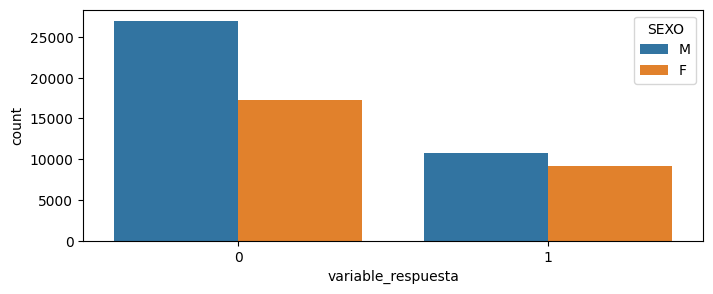

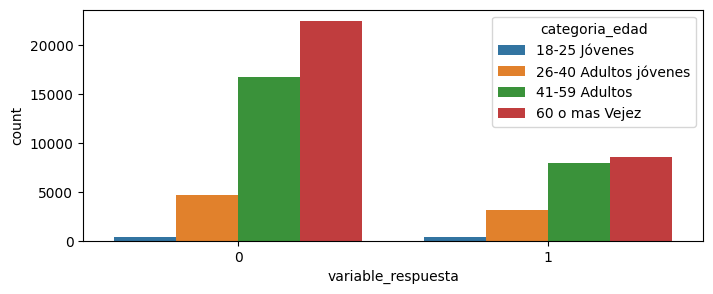

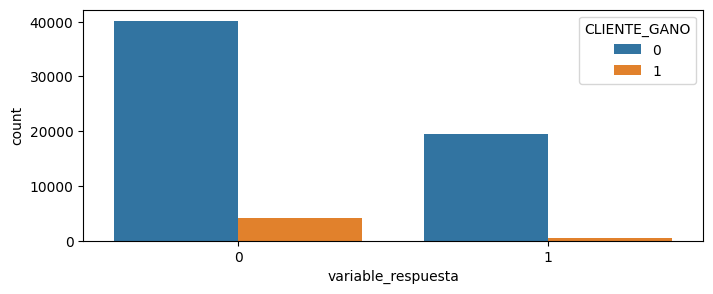

In [97]:
print("===================================================================================================")
for x in cuali_vars:
    
    plt.figure(figsize=(8, 3))
    sns.countplot(x = target, hue = x, data = df)
    plt.show()
    print("===================================================================================================")

De los graficos podemos concluir que:

* En nignuno de los 3 hay una distribución diferente vs la variable de respuesta, es decir, que tanto el 0 como el 1 mantienen la misma distribución mayoritaria de los valores.

* En su mayoria son los hombres los que con mayor frecuencia apuestan.

* Los adultos de 60 años o más son los que con mayor frecuencia hacen apuestas de chance.

* El comportamient de la variable de si el cliente gana o no, se comporta respecto a lo esperado.


#### Variables cuantitativas

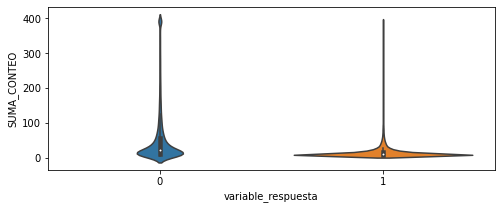

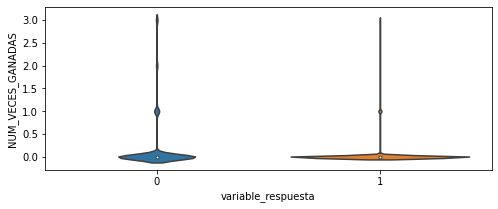

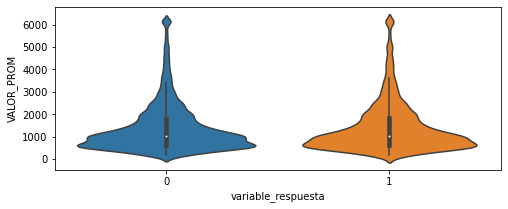

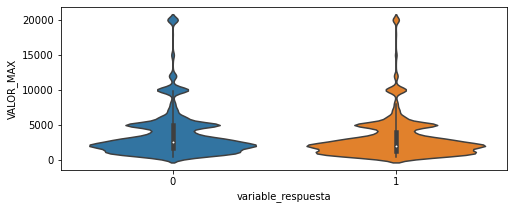

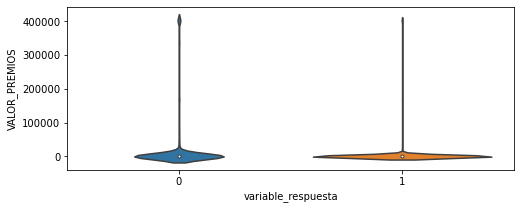

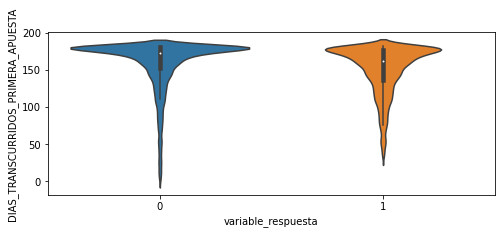

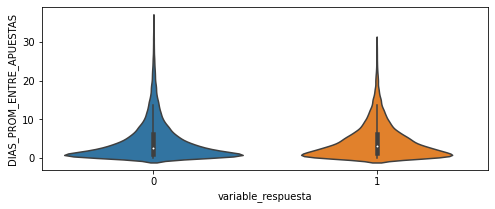

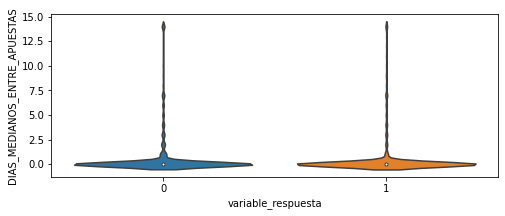

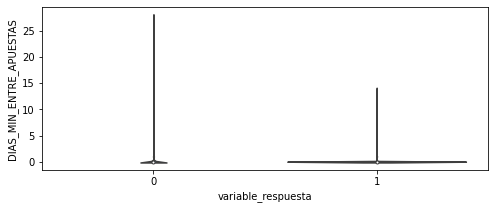

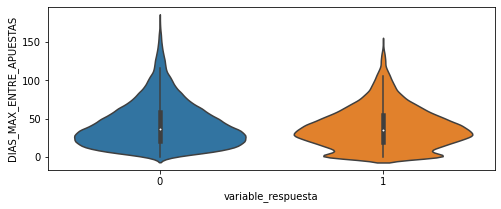

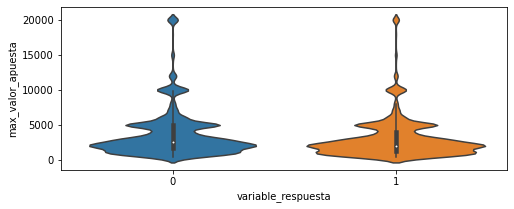

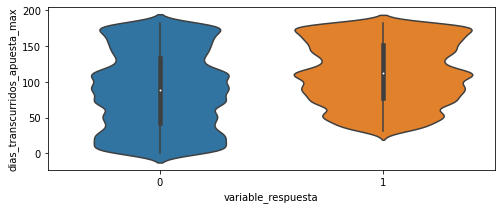

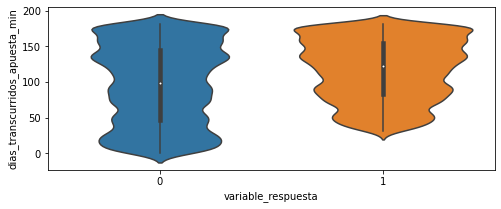

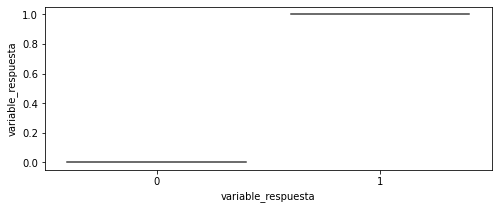

In [44]:
print("===================================================================================================")
for x in cuants_vars:
    
    plt.subplots(figsize=(8, 3))
    sns.violinplot(x = target, y = x, data = df)
    plt.show()
    print("===================================================================================================")

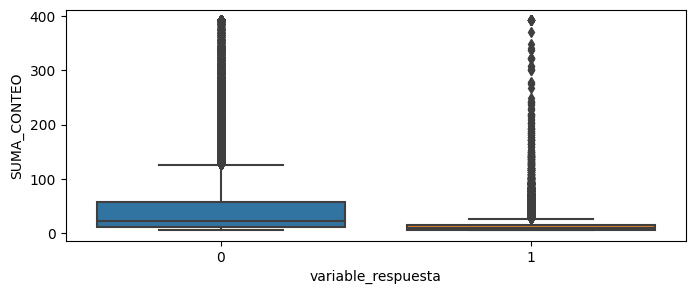

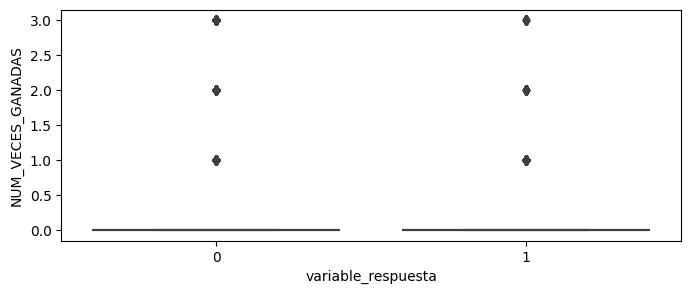

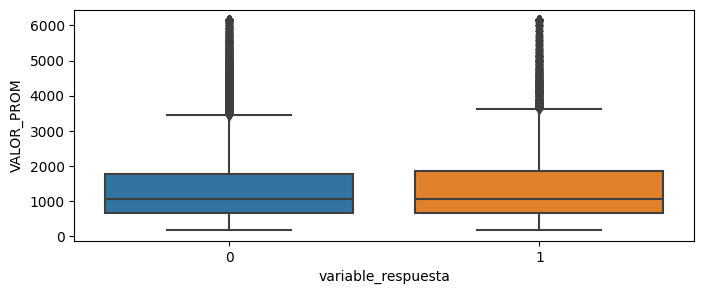

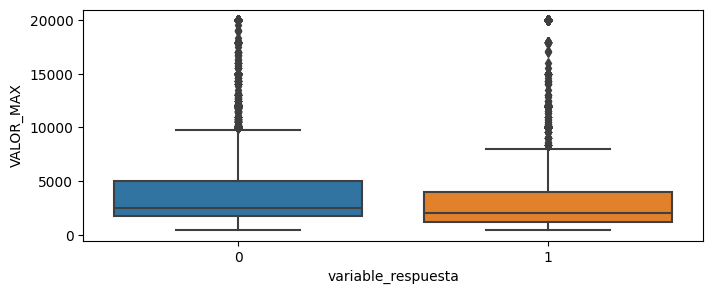

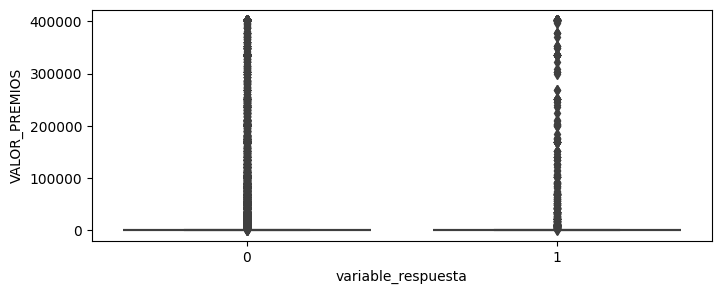

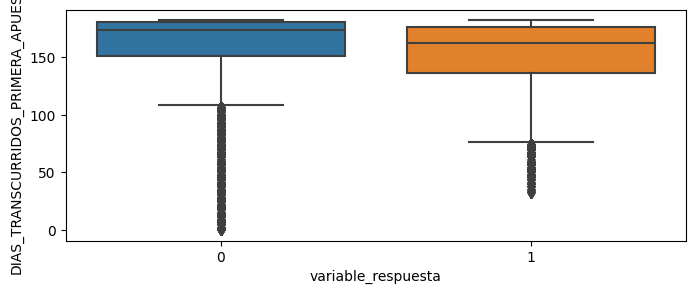

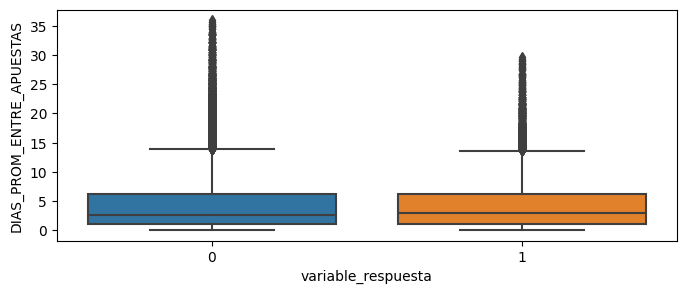

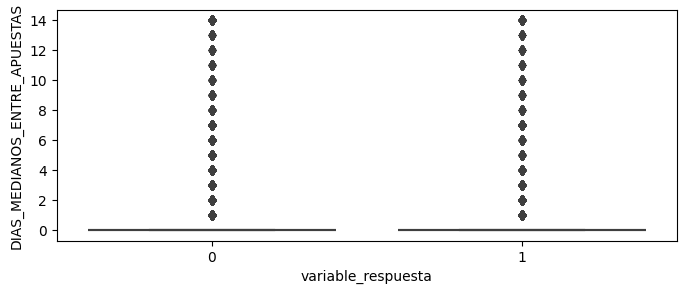

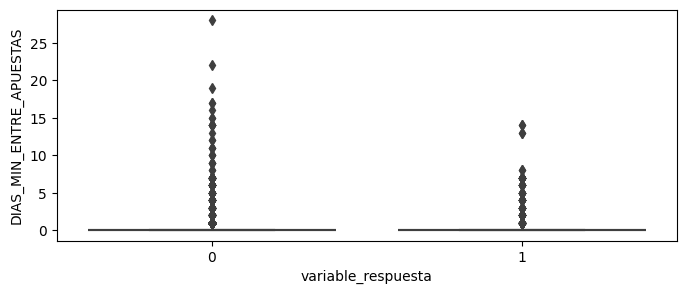

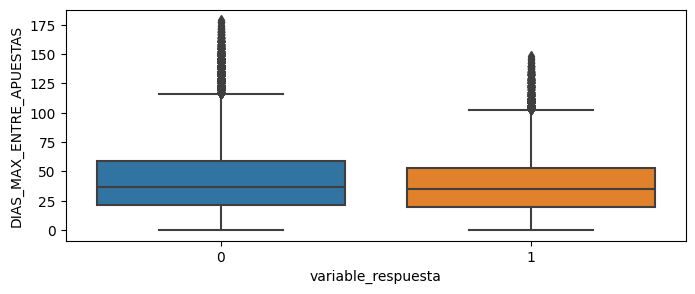

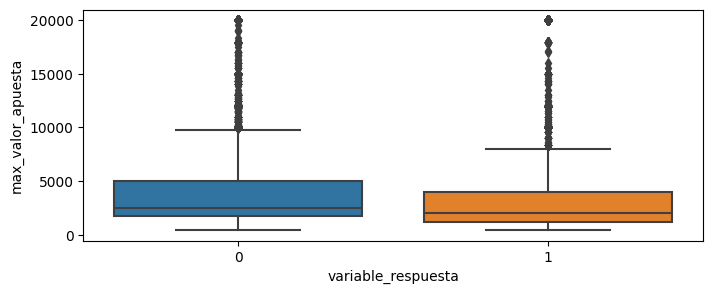

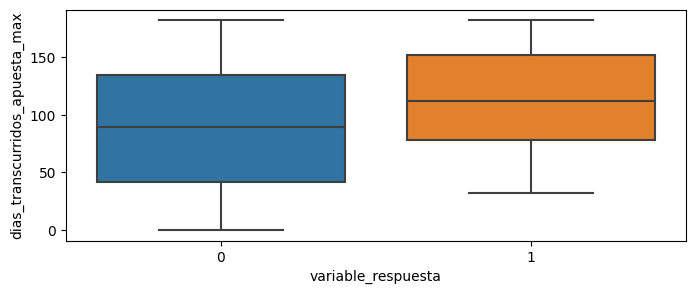

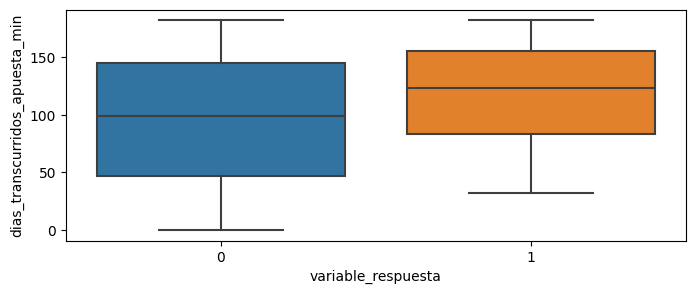

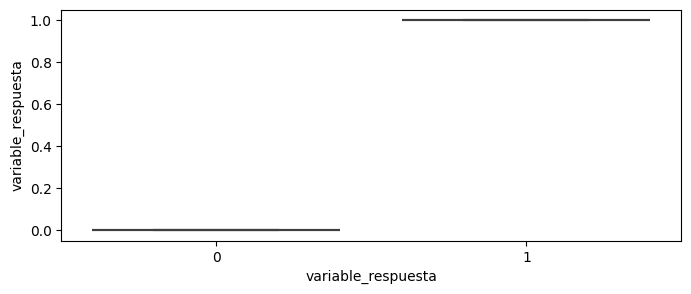

In [98]:
print("===================================================================================================")
for x in cuants_vars:
    
    plt.subplots(figsize=(8, 3))
    sns.boxplot(x = target, y = x, data = df)
    plt.show()
    print("===================================================================================================")

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64265 entries, 0 to 300860
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   SUMA_CONTEO                         64265 non-null  float64 
 1   NUM_VECES_GANADAS                   64265 non-null  float64 
 2   VALOR_PROM                          64265 non-null  float64 
 3   VALOR_MAX                           64265 non-null  float64 
 4   VALOR_PREMIOS                       64265 non-null  float64 
 5   DIAS_TRANSCURRIDOS_PRIMERA_APUESTA  64265 non-null  int64   
 6   DIAS_PROM_ENTRE_APUESTAS            64265 non-null  float64 
 7   DIAS_MEDIANOS_ENTRE_APUESTAS        64265 non-null  float64 
 8   DIAS_MIN_ENTRE_APUESTAS             64265 non-null  float64 
 9   DIAS_MAX_ENTRE_APUESTAS             64265 non-null  float64 
 10  max_valor_apuesta                   64265 non-null  float64 
 11  dias_transcurridos_apuesta_max  

In [79]:
df[(df['variable_respuesta'] == 1)]['SUMA_CONTEO'].describe()

count    20285.000000
mean        15.256495
std         21.834271
min          6.000000
25%          7.000000
50%          9.000000
75%         15.000000
max        392.000000
Name: SUMA_CONTEO, dtype: float64

In [80]:
df[(df['variable_respuesta'] == 0)]['SUMA_CONTEO'].describe()

count    43980.000000
mean        56.241633
std         84.933288
min          6.000000
25%         11.000000
50%         22.000000
75%         57.000000
max        392.000000
Name: SUMA_CONTEO, dtype: float64

In [84]:
df[(df['variable_respuesta'] == 0)]['dias_transcurridos_apuesta_max'].describe()

count    43980.000000
mean        88.492337
std         53.872097
min          0.000000
25%         42.000000
50%         89.000000
75%        134.000000
max        182.000000
Name: dias_transcurridos_apuesta_max, dtype: float64

In [83]:
df[(df['variable_respuesta'] == 1)]['dias_transcurridos_apuesta_max'].describe()

count    20285.000000
mean       112.988957
std         42.993674
min         31.000000
25%         78.000000
50%        112.000000
75%        152.000000
max        182.000000
Name: dias_transcurridos_apuesta_max, dtype: float64

## Modelado

In [49]:
X = pd.get_dummies(df, columns = cuali_vars)

In [50]:
new_names = []

for x in X.columns:
    
    new_name_x = x.replace('>', 'ma').replace('<', 'me').replace(',', '_').replace('(', '_').replace('[', '_').replace(')', '_').replace(']', '_')
    new_names.append(new_name_x)

    
X.columns = new_names

In [51]:
target = 'variable_respuesta'
y = X[target]
X = X.drop(columns = target)

In [52]:
from sklearn.model_selection import train_test_split #libreria para train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [53]:
print(X_train.shape)
print(X_test.shape)

(44985, 21)
(19280, 21)


In [54]:
print(X_train.shape)
print(X_test.shape)

(44985, 21)
(19280, 21)


## Librerias ML

In [58]:
from sklearn.tree import DecisionTreeClassifier #libreria para arboles de decisión
from sklearn import tree, metrics  #libreria para visualizar arboles


from sklearn.ensemble import BaggingClassifier #libreria para bagging

from sklearn.ensemble import RandomForestClassifier #Para usar randomForest
from sklearn.model_selection import ParameterGrid #Con esto tuneamos con los grids
from sklearn.model_selection import RepeatedKFold #para validacion cruzada
from sklearn.model_selection import RandomizedSearchCV #Validación cruzada del rf
from sklearn.model_selection import GridSearchCV  #libreria para tunear los hiperparametros

import xgboost as xgb
import multiprocessing #para usar varios procesadores

from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier

#import shap #Valores shaP


"==============================FUNCION ==========================================="

from utils import evaluate # Funcion 

pd.options.display.max_columns = None

## Random Forest

In [60]:
     # ===========  Specification Hyper-parameters of model  ===========
max_depth_vec = np.arange(8, 15, 1) 
min_samples_split_vec = np.arange(20, 75, 10)
min_samples_leaf_vec =  np.arange(5, 25, 5)
max_leaf_nodes_vec = np.arange(20, 25, 1)
min_impurity_decrease_vec = [0, 0.001, 0.002, 0.05, 0.1] 
criterion_vec = ['entropy', 'gini']

parametros = {'max_depth': max_depth_vec,                       # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
              'min_samples_split': min_samples_split_vec,       # prepoda: el mínimo número de registros necesarios para crear una nueva rama
              'min_samples_leaf': min_samples_leaf_vec,         # prepoda: el mínimo número de registros en una hoja
              'max_leaf_nodes': max_leaf_nodes_vec,             # prepoda: máximo número de nodos hojas
              'min_impurity_decrease': min_impurity_decrease_vec, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
              'criterion': criterion_vec                        # el criterio de particionamiento de un conjunto de datos
             }


params_set = {
             'n_estimators' : 100,    # Número de modelos a crear   
             'max_features' : 'auto', # Número o % de atributos de la muestra de aprendizaje
             'bootstrap' : True,      # Utilizar reemplazo en el muestreo de los registros de aprendizaje
             'oob_score' : True,      # Evaluar cada modelo con los registros no utilizados en su aprendizaje
             'n_jobs' : -1,           # Número de cores a utilizar
             'random_state' : 1234,   # random seed para el generador aleatorio
             'verbose' : 0            # controla la cantidad de información a reportar
             }

            # ===========  Specification metrics to compute  ===========
scoring = {'accuracy':'accuracy',
           'precision':'precision',
           'recall': 'recall',
           'F1': 'f1'}

            # ===========  Specification Classifier  ===========            
rforest = RandomForestClassifier(**params_set)

            # ===========  Tuning hyper-parameters  ===========
# Searching in the complete grid
grid = RandomizedSearchCV(rforest,
                          parametros,
                          cv = 3,
                          n_iter = 50,
                          scoring = scoring,
                          refit = 'F1',
                          n_jobs = -1
                         )
# Searching the best model
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=1234),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 8,  9, 10, 11, 12, 13, 14]),
                                        'max_leaf_nodes': array([20, 21, 22, 23, 24]),
                                        'min_impurity_decrease': [0, 0.001,
                                                                  0.002, 0.05,
                                                                  0.1],
                                        'min_samples_leaf': array([ 5, 10, 15, 20]),
                                        'min_samples_split': array([20, 30, 40, 50, 60, 70])},
                   refit='F1',
                   scoring={'F1': 'f1', 'accuracy': 'accuracy',
                            'p

In [62]:
# Best Params of Model
grid.best_params_

{'min_samples_split': 30,
 'min_samples_leaf': 5,
 'min_impurity_decrease': 0,
 'max_leaf_nodes': 24,
 'max_depth': 14,
 'criterion': 'gini'}

In [61]:
best_hyper_fit = {'min_samples_split': 30,
                 'min_samples_leaf': 5,
                 'min_impurity_decrease': 0,
                 'max_leaf_nodes': 24,
                 'max_depth': 14,
                 'criterion': 'gini'}

best_hyper = params_set.copy()
best_hyper.update(best_hyper_fit)

In [62]:
rforest = RandomForestClassifier(**best_hyper)
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, max_leaf_nodes=24, min_impurity_decrease=0,
                       min_samples_leaf=5, min_samples_split=30, n_jobs=-1,
                       oob_score=True, random_state=1234)

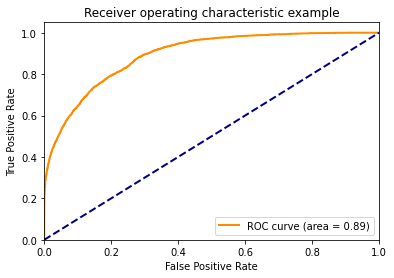

({'recall': 0.5158611526324531,
  'precision': 0.8340494092373791,
  'f1': 0.6374551051821448,
  'accuracy': 0.816753112033195,
  'auc': 0.892502463816745},
 array([[12641,   618],
        [ 2915,  3106]], dtype=int64))

In [68]:
y_pred  = rforest.predict(X_test)
y_proba = rforest.predict_proba(X_test)[:,1]

metrics = evaluate(y_test, y_pred, y_proba)
metrics

In [63]:
from sklearn.tree import plot_tree

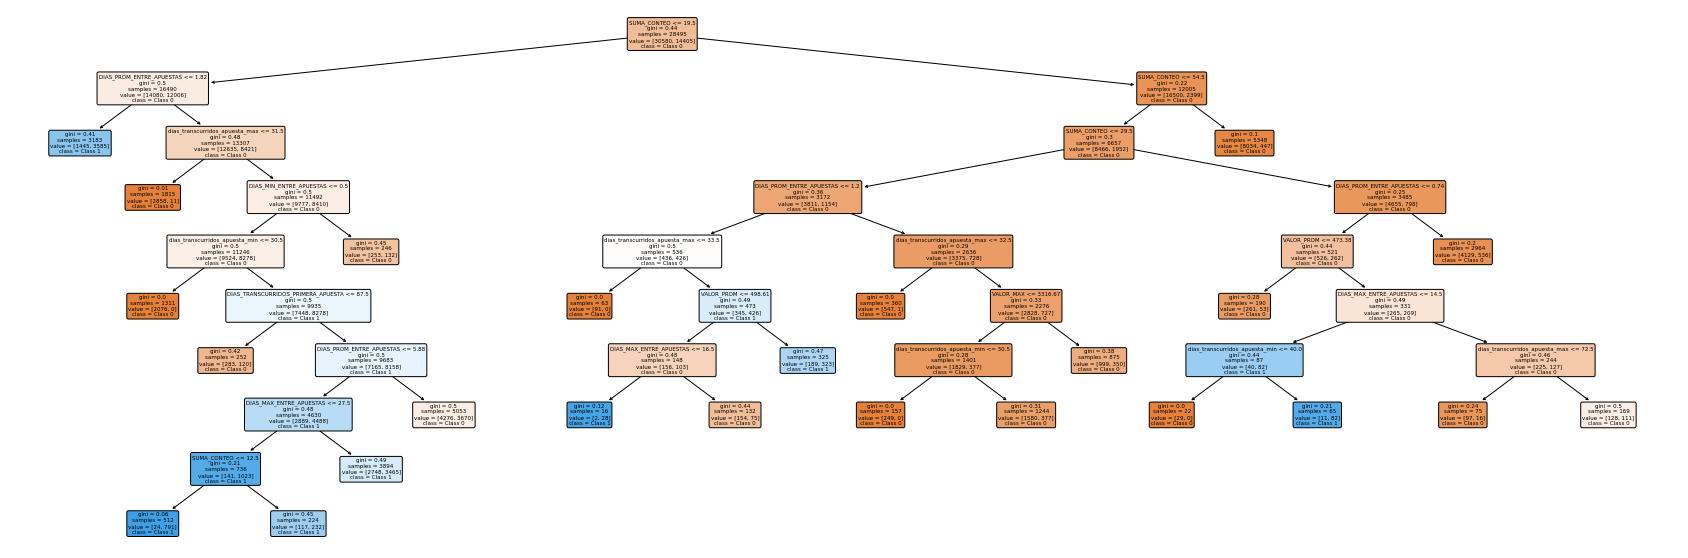

In [107]:
# Elegimos uno de los árboles para visualizar. Por ejemplo, el primero en el ensamble
single_tree = rforest.estimators_[0]

# Configuramos el tamaño de la figura
plt.figure(figsize=(30,10))

# Visualizamos el árbol seleccionado
plot_tree(single_tree, 
          filled=True, 
          feature_names=X_train.columns, 
          class_names=['Class 0', 'Class 1'], 
          rounded=True, 
          proportion=False, 
          precision=2)

# Mostramos la figura
plt.show()

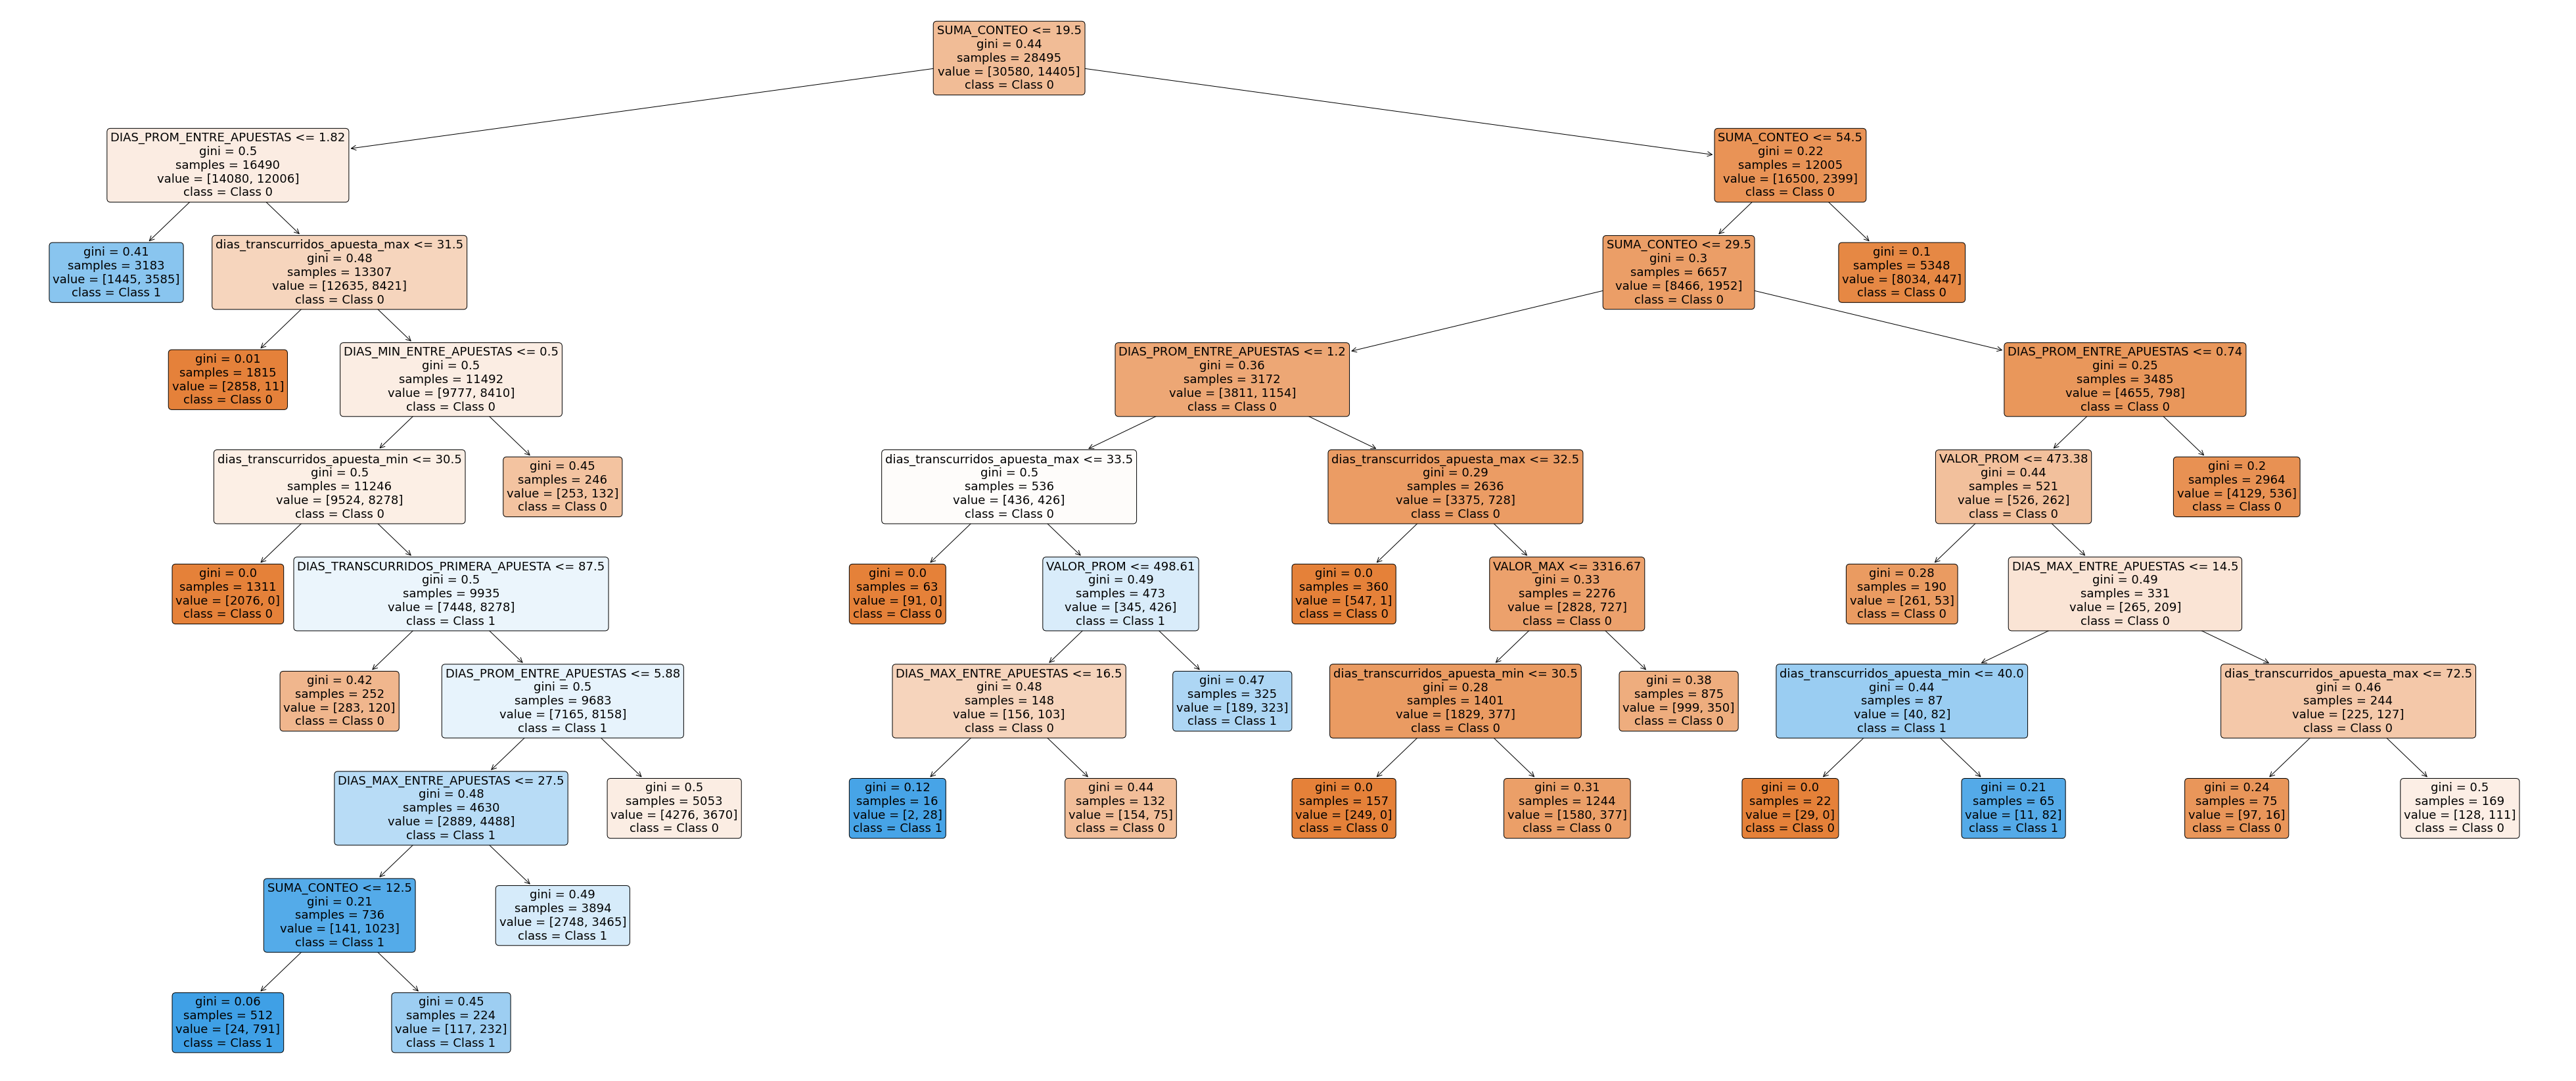

In [71]:
# Elegimos uno de los árboles para visualizar. Por ejemplo, el primero en el ensamble
single_tree = rforest.estimators_[0]

# Configuramos el tamaño de la figura
plt.figure(figsize=(70, 30))

# Visualizamos el árbol seleccionado
plot_tree(single_tree, 
          filled=True, 
          feature_names=X_train.columns, 
          class_names=['Class 0', 'Class 1'], 
          rounded=True, 
          proportion=False, 
          precision=2,
          fontsize=18)  # Ajusta el tamaño de la fuente aquí según sea necesario

# Mostramos la figura
plt.show()

## Bagging

In [69]:
model   = DecisionTreeClassifier()

scoring = {'accuracy':'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'F1': 'f1'}

grid = {'max_depth': np.arange(2, 7, 1)}

grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           n_jobs = -1,
                           cv = 5,
                           scoring = scoring,
                           refit = 'F1'
                           )

grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.697223 using {'max_depth': 4}


In [70]:
tree = DecisionTreeClassifier(max_depth = 4)
num_trees = 100
seed = 8

# Para entrenar el bagging, primero se llama el arbol de decisión, usaré el tuneo del modelo anterior para tenerlo en cuenta
# que fue un arbol de produndidad 3, para posteior a esto, tunerar el bagging

model_bagg = BaggingClassifier(base_estimator = tree,
                               n_estimators = num_trees,
                               random_state = seed)

In [71]:
model  = model_bagg

scoring = {'accuracy':'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'F1': 'f1',
           }

grid = {'base_estimator__max_depth': np.arange(2, 7, 1),
        'base_estimator__min_samples_leaf': np.arange(0, 20, 5), 
        'n_estimators' : np.arange(0, 100, 33)}                                                                                                            

grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           n_jobs = -1,
                           cv = 5,
                           scoring = scoring,
                           refit = 'F1'
                           )

grid_search.fit(X_train, y_train)

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan 0.7255085
 0.73442259 0.73466711        nan 0.7255085  0.73442259 0.73466711
        nan 0.7255085  0.73442259 0.73466711        nan        nan
        nan        nan        nan 0.77343559 0.774347   0.77365789
        nan 0.77343559 0.774347   0.77365789        nan 0.77343559
 0.774347   0.77365789        nan        nan        nan        nan
        nan 0.7823719  0.78301656 0.78301656        nan 0.78243859
 0.78303879 0.78306102        nan 0.78243859 0.78308325 0.78306102
        nan        nan        nan        nan        nan 0.80297877
 0.80264533 0.80275647        nan 0.80284539 0.80266756 0.80282316
        nan 0.80275647 0.8026231  0.8027787         nan        nan
        nan        nan        nan 0.81562743 0.81813938 0.81758364
        nan 0.81558297 0.81813938 0.81751695        na

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                                         n_estimators=100, random_state=8),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': array([2, 3, 4, 5, 6]),
                         'base_estimator__min_samples_leaf': array([ 0,  5, 10, 15]),
                         'n_estimators': array([ 0, 33, 66, 99])},
             refit='F1',
             scoring={'F1': 'f1', 'accuracy': 'accuracy',
                      'precision': 'precision', 'recall': 'recall'})

In [72]:
grid_search.best_params_

{'base_estimator__max_depth': 4,
 'base_estimator__min_samples_leaf': 10,
 'n_estimators': 33}

In [73]:
seed = 8
tree = DecisionTreeClassifier(max_depth = 4,
                              min_samples_leaf = 10)
num_trees = 33

bag = BaggingClassifier(base_estimator = tree,
                        n_estimators = num_trees,
                        random_state = seed)

bag.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        min_samples_leaf=10),
                  n_estimators=33, random_state=8)

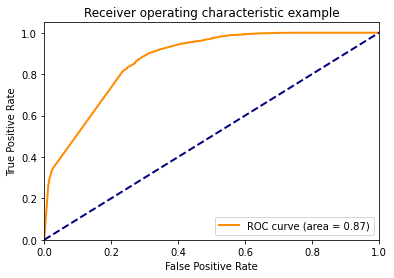

({'recall': 0.8158113270220894,
  'precision': 0.6112493777999004,
  'f1': 0.6988688909440137,
  'accuracy': 0.7804460580912863,
  'auc': 0.868269513850128},
 array([[10135,  3124],
        [ 1109,  4912]], dtype=int64))

In [74]:
y_pred  = bag.predict(X_test)
y_proba = bag.predict_proba(X_test)[:,1]
evaluate(y_test, y_pred, y_proba)

## XGBOOST

In [55]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
PARAM_SCALE_POS = np.ceil((y_train.shape[0] - y_train.sum())  / y_train.sum()).astype(int) #Este parametro ayuda a equilibrar Y

scoring = {'acc': 'accuracy',
           'precision' : 'precision',
           'recall': 'recall',
           'f1' : 'f1',
           'neg_log_loss': 'neg_log_loss'}

params_eval = { 'eta' : np.arange(0, 1, 0.25),  #Similar al rearning rate - Hace el modelo más robusto
                'max_depth': np.arange(1, 4, 1), # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
                'min_child_weight': np.arange(1, 6, 1), #número mínimo de instancias necesarias para estar en cada nodo. Cuanto mayor min_child_weightsea, más conservador será el algoritmo.
                'learning_rate': np.arange(0, 0.55, 0.025), #Valor que disminuye el valor de los step etre las interacciones de cada arbol
                'colsample_bytree': np.arange(0.3, 0.7, 0.05), #es la relación de submuestra de las columnas al construir cada árbol. El submuestreo ocurre una vez por cada árbol construido.
                'max_delta_step' : np.arange(0.3, 0.8, 0.05),  #Ayuda a equilibrar un la prediccion cuando hay algun tipo de desbalanceo
                'n_estimators': np.arange(0, 500, 100)
}

sed = 84

params_set = {
                'n_estimators': 300,
                'subsample': 0.8,
                'nthread': 4,
                'objective': 'binary:logistic',
                'scale_pos_weight': PARAM_SCALE_POS,
                'n_jobs': -1,
                'seed': sed
}


In [59]:
xgb_model1 = xgb.XGBClassifier(**params_set)
gsearch1 = RandomizedSearchCV(
                        estimator = xgb_model1,
                        param_distributions = params_eval,
                        n_iter  = 50,
                        scoring = scoring,
                        refit   = 'f1',
                        n_jobs  = -1,
                        cv      = 5,
                        verbose = 0)

%time gsearch1.fit(X_train, y_train)

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.41311405 -0.52319028 -0.39148067 -0.47162449         nan -0.40670303
 -0.40476777 -0.69314718 -0.45510456 -0.69314718 -0.69314718 -0.42008357
         nan -0.41506788 -0.43841733 -0.69314718 -0.41144229 -0.37288475
 -0.69314718 -0.37973787 -0.40634015 -0.39981762 -0.69314718 -0.38110263
 -0.38428922 -0.69314718 -0.41947786 -0.37356643 -0.40949703 -0.44559436
 -0.41656446         nan -0.69314718 -0.39142316 -0.43016602 -0.40867788
 -0.42773507 -0.69314718 -0.43048262 -0.69314718 -0.42225958 -0.41643535
 -0.69314718         nan -0.43530029 -0.41389615 -0.38246646 -0.69314718
 -0.68532188 -0.40569612]
  warnings.warn(


Wall time: 1min 55s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5 

In [77]:
gsearch1.best_params_

{'n_estimators': 300,
 'min_child_weight': 4,
 'max_depth': 3,
 'max_delta_step': 0.6499999999999999,
 'learning_rate': 0.25,
 'eta': 0.25,
 'colsample_bytree': 0.5999999999999999}

In [60]:
best_hyper_fit = {'n_estimators': 300,
                 'min_child_weight': 4,
                 'max_depth': 3,
                 'max_delta_step':  0.6499999999999999,                
                 'learning_rate': 0.25,
                 'eta': 0.25,
                 'colsample_bytree': 0.599999999999999
                 }

In [61]:
best_hyperparams = params_set.copy()
best_hyperparams.update(best_hyper_fit)

xgb_model1 = xgb.XGBClassifier(**best_hyperparams)

# Fit model
xgb_model1.fit(X_train, y_train, eval_metric = ['logloss'])

C:\Users\santi\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.599999999999999, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.25, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0.6499999999999999,
              max_depth=3, max_leaves=None, min_child_weight=4, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=-1, nthread=4,
              num_parallel_tree=None, ...)

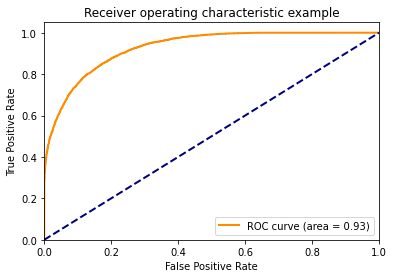

({'recall': 0.8933731938216243,
  'precision': 0.6454283657307416,
  'f1': 0.7494252873563219,
  'accuracy': 0.8134336099585062,
  'auc': 0.9277406832077372},
 array([[10304,  2955],
        [  642,  5379]], dtype=int64))

In [80]:
y_pred  = xgb_model1.predict(X_test)
y_proba = xgb_model1.predict_proba(X_test)[:,1]

metrics = evaluate(y_test, y_pred, y_proba)
metrics

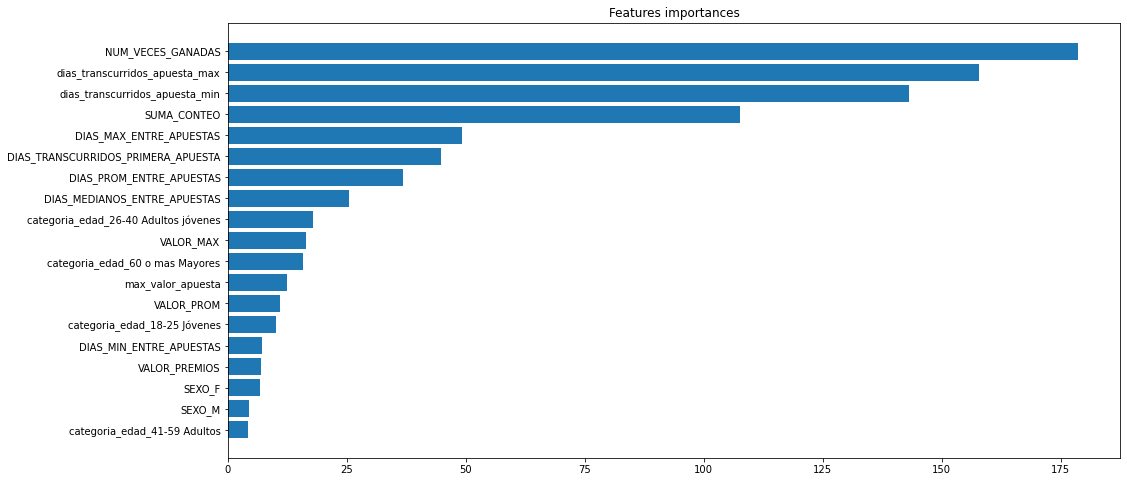

In [62]:
# Importances variables
importances_features1 = xgb_model1.get_booster().get_score(importance_type = "gain")
importances_features1 = pd.DataFrame.from_dict(importances_features1, orient = 'index')

importances_features1.reset_index(inplace = True)
importances_features1.columns = ['variable', 'value']

importances_features1 = importances_features1.sort_values('value', ascending = True)

#importances_features1 = importances_features1[importances_features1['value']>=20]

plt.figure(figsize = (16, 8))
plt.title("Features importances")
plt.barh(range(importances_features1.shape[0]), importances_features1['value'])
plt.yticks(range(importances_features1.shape[0]), importances_features1['variable'], fontsize = 10)
plt.show()

### Se selecciona el XGBOOST como el mejor modelo, dado su F1 Score

## Ajuste del modelo con variables seleccionadas

In [63]:
# basados en recall se escogen las 20 variables mas significativas

vec_var = importances_features1.loc[importances_features1['value'] >= 15, 'variable']
vec_var = list(vec_var)

In [64]:
vec_var

['categoria_edad_60 o mas Mayores',
 'VALOR_MAX',
 'categoria_edad_26-40 Adultos jóvenes',
 'DIAS_MEDIANOS_ENTRE_APUESTAS',
 'DIAS_PROM_ENTRE_APUESTAS',
 'DIAS_TRANSCURRIDOS_PRIMERA_APUESTA',
 'DIAS_MAX_ENTRE_APUESTAS',
 'SUMA_CONTEO',
 'dias_transcurridos_apuesta_min',
 'dias_transcurridos_apuesta_max',
 'NUM_VECES_GANADAS']

In [65]:
X_train_final = X_train[vec_var].copy()
X_test_final = X_test[vec_var].copy()

In [66]:
X_train_final.shape

(44985, 11)

In [67]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
PARAM_SCALE_POS = np.ceil((y_train.shape[0] - y_train.sum())  / y_train.sum()).astype(int) #Este parametro ayuda a equilibrar Y

scoring = {'acc': 'accuracy',
           'precision' : 'precision',
           'recall': 'recall',
           'f1' : 'f1',
           'neg_log_loss': 'neg_log_loss'}

params_eval = { 'eta' : np.arange(0, 1, 0.25),  #Similar al rearning rate - Hace el modelo más robusto
                'max_depth': np.arange(1, 4, 1), # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
                'min_child_weight': np.arange(1, 6, 1), #número mínimo de instancias necesarias para estar en cada nodo. Cuanto mayor min_child_weightsea, más conservador será el algoritmo.
                'learning_rate': np.arange(0, 0.55, 0.025), #Valor que disminuye el valor de los step etre las interacciones de cada arbol
                'colsample_bytree': np.arange(0.3, 0.7, 0.05), #es la relación de submuestra de las columnas al construir cada árbol. El submuestreo ocurre una vez por cada árbol construido.
                'max_delta_step' : np.arange(0.3, 0.8, 0.05),  #Ayuda a equilibrar un la prediccion cuando hay algun tipo de desbalanceo
                'n_estimators': np.arange(0, 500, 100)
}

sed = 84

params_set = {
                'n_estimators': 300,
                'subsample': 0.8,
                'nthread': 4,
                'objective': 'binary:logistic',
                'scale_pos_weight': PARAM_SCALE_POS,
                'n_jobs': -1,
                'seed': sed
}



In [68]:
xgb_model2 = xgb.XGBClassifier(**params_set)

gsearch2 = RandomizedSearchCV(
                        estimator           = xgb_model2,
                        param_distributions = params_eval,
                        n_iter  = 50,
                        scoring = scoring,
                        refit   = 'f1',
                        n_jobs  = -1,
                        cv      = 3,
                        verbose = 0)

gsearch2.fit(X_train_final, y_train)


C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.41017203 -0.69314718 -0.48355301 -0.69314718 -0.55219773 -0.69314718
 -0.69314718 -0.37820657         nan -0.41197072 -0.44265074 -0.3976993
 -0.45056629 -0.51957613 -0.39046138 -0.69314718 -0.40062088 -0.37417333
         nan -0.40147916 -0.45156869 -0.44328568 -0.69314718 -0.3819658
 -0.61027835 -0.69314718 -0.41190372 -0.40557986 -0.45182583 -0.69314718
 -0.41757561 -0.38158524 -0.38641841 -0.41835363 -0.40889821 -0.54848467
 -0.38529716 -0.38211366 -0.50317652 -0.38699613 -0.69314718 -0.41101882
 -0.38052691 -0.38354021 -0.38959794 -0.40702355 -0.69314718 -0.3817682
 -0.50529801 -0.38624938]
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5 

In [93]:
gsearch2.best_params_

{'n_estimators': 400,
 'min_child_weight': 3,
 'max_depth': 3,
 'max_delta_step': 0.35,
 'learning_rate': 0.45,
 'eta': 0.25,
 'colsample_bytree': 0.5499999999999999}

In [69]:
best_hyper_fit = {'n_estimators': 400,
                 'min_child_weight': 3,
                 'max_depth': 3,
                 'max_delta_step':  0.35,                
                 'learning_rate': 0.45,
                 'eta': 0.45,
                 'colsample_bytree':0.5499999999999999
                 }

In [70]:
best_hyperparams = params_set.copy()
best_hyperparams.update(best_hyper_fit)

xgb_model2 = xgb.XGBClassifier(**best_hyperparams)

# Fit model
xgb_model2.fit(X_train_final, y_train, eval_metric = ['logloss']) #aucpr

C:\Users\santi\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5499999999999999, early_stopping_rounds=None,
              enable_categorical=False, eta=0.45, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.45, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0.35, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=-1, nthread=4,
              num_parallel_tree=None, ...)

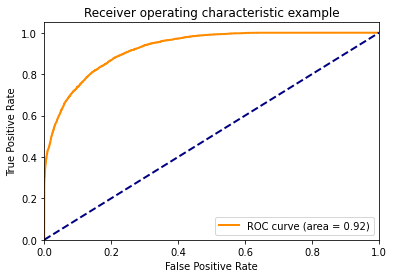

({'recall': 0.8794220229197808,
  'precision': 0.6546735905044511,
  'f1': 0.7505847331490538,
  'accuracy': 0.8174792531120332,
  'auc': 0.9246970144554897},
 array([[10466,  2793],
        [  726,  5295]], dtype=int64))

In [97]:
y_pred  = xgb_model2.predict(X_test_final)
y_proba = xgb_model2.predict_proba(X_test_final)[:,1]

metrics = evaluate(y_test, y_pred, y_proba)
metrics

### Las metricas se mantienen, la selección de variables es optima.

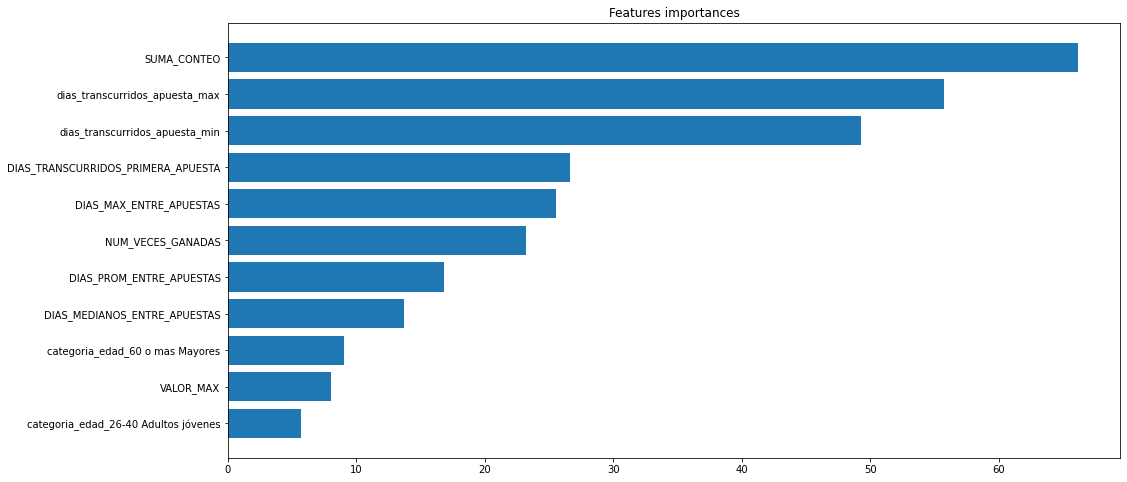

In [74]:
# Importances variables
importances_features1 = xgb_model2.get_booster().get_score(importance_type = "gain")
importances_features1 = pd.DataFrame.from_dict(importances_features1, orient = 'index')

importances_features1.reset_index(inplace = True)
importances_features1.columns = ['variable', 'value']

importances_features1 = importances_features1.sort_values('value', ascending = True)

#importances_features1 = importances_features1[importances_features1['value']>=10]

plt.figure(figsize = (16, 8))
plt.title("Features importances")
plt.barh(range(importances_features1.shape[0]), importances_features1['value'])
plt.yticks(range(importances_features1.shape[0]), importances_features1['variable'], fontsize = 10)
plt.show()

In [75]:
importances_features1

,variable,value
2,categoria_edad_26-40 Adultos jóvenes,5.706931
1,VALOR_MAX,8.034641
0,categoria_edad_60 o mas Mayores,9.037603
3,DIAS_MEDIANOS_ENTRE_APUESTAS,13.727010
4,DIAS_PROM_ENTRE_APUESTAS,16.816284
10,NUM_VECES_GANADAS,23.242643
6,DIAS_MAX_ENTRE_APUESTAS,25.579830
5,DIAS_TRANSCURRIDOS_PRIMERA_APUESTA,26.623787
8,dias_transcurridos_apuesta_min,49.280842
9,dias_transcurridos_apuesta_max,55.766323


In [107]:
importances_features1.to_excel(path + 'salida_feature.xlsx')

<ipython-input-107-9c74341e4bc6>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  importances_features1.to_excel(path + 'salida_feature.xlsx')


## Ahora lo correremos para toda la BD de clientes

In [76]:
importances_features1

,variable,value
2,categoria_edad_26-40 Adultos jóvenes,5.706931
1,VALOR_MAX,8.034641
0,categoria_edad_60 o mas Mayores,9.037603
3,DIAS_MEDIANOS_ENTRE_APUESTAS,13.727010
4,DIAS_PROM_ENTRE_APUESTAS,16.816284
10,NUM_VECES_GANADAS,23.242643
6,DIAS_MAX_ENTRE_APUESTAS,25.579830
5,DIAS_TRANSCURRIDOS_PRIMERA_APUESTA,26.623787
8,dias_transcurridos_apuesta_min,49.280842
9,dias_transcurridos_apuesta_max,55.766323


### Nos quedamos con las variables seleccionadas

In [85]:
X_var_select = X[vec_var].copy()

In [86]:
X_var_select

,categoria_edad_60 o mas Mayores,VALOR_MAX,categoria_edad_26-40 Adultos jóvenes,DIAS_MEDIANOS_ENTRE_APUESTAS,DIAS_PROM_ENTRE_APUESTAS,DIAS_TRANSCURRIDOS_PRIMERA_APUESTA,DIAS_MAX_ENTRE_APUESTAS,SUMA_CONTEO,dias_transcurridos_apuesta_min,dias_transcurridos_apuesta_max,NUM_VECES_GANADAS
0,False,6000.0,False,0.0,28.166667,176,105.0,6.0,176,7,0.0
14,False,5950.0,True,0.0,8.642857,180,44.0,8.0,138,180,0.0
26,True,1000.0,False,0.0,1.280488,137,40.0,11.0,112,94,0.0
38,False,2000.0,False,0.0,9.058824,159,85.0,12.0,119,159,0.0
41,True,6000.0,False,0.0,0.763158,182,15.0,74.0,182,176,0.0
...,...,...,...,...,...,...,...,...,...,...,...
300848,False,2600.0,False,1.0,5.518519,152,50.0,24.0,76,152,0.0
300850,False,2000.0,False,0.0,1.200000,13,6.0,6.0,13,7,0.0
300851,False,10000.0,False,0.0,14.333333,182,130.0,11.0,10,155,0.0
300858,False,1000.0,False,0.0,1.783133,155,35.0,14.0,49,7,0.0


In [87]:
X.shape

(64265, 21)

In [88]:
probabilidades = xgb_model2.predict_proba(X_var_select)

In [89]:
probabilidades

array([[9.9858052e-01, 1.4195099e-03],
       [3.6466897e-02, 9.6353310e-01],
       [5.9328437e-02, 9.4067156e-01],
       ...,
       [9.9968255e-01, 3.1742768e-04],
       [9.9965256e-01, 3.4743786e-04],
       [8.2707351e-01, 1.7292650e-01]], dtype=float32)

In [124]:
# Opcional: Extraer las probabilidades para una clase específica, si es necesario
probabilidades_clase_positiva = probabilidades[:, 1]  # Asume clasificación binaria

In [130]:
categorias_riesgo = np.where(
    probabilidades_clase_positiva <= 0.33, 'Bajo',
    np.where(probabilidades_clase_positiva <= 0.66, 'Medio', 'Alto')
)

unicos, conteos = np.unique(categorias_riesgo, return_counts=True)
distribucion_riesgo = dict(zip(unicos, conteos))
print(distribucion_riesgo)

{'Alto': 21726, 'Bajo': 31086, 'Medio': 11453}


In [133]:
X.shape

(64265, 21)

In [141]:
print(100*(21726/64265), 'Alto')
print(100*(11453/64265),'Medio')
print(100*(31086/64265),'Bajo')

33.806893332295964 Alto
17.821520267641798 Medio
48.37158640006224 Bajo


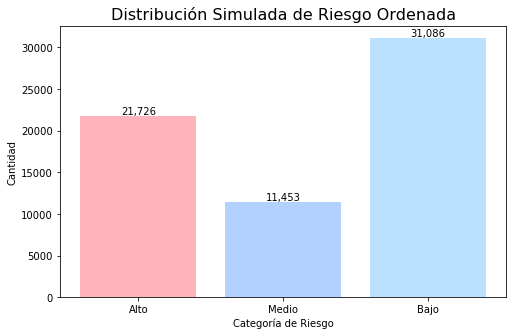

In [132]:
# Ordenar las categorías específicamente como 'Alto', 'Medio', 'Bajo'
categorias_ordenadas = ['Alto', 'Medio', 'Bajo']
conteos_ordenados = [distribucion_riesgo[categoria] for categoria in categorias_ordenadas]


colores_pastel = ['#FFB3BA', '#B3D1FF', '#BAE1FF']  # Rojo pastel, azul pastel y celeste pastel

# Crear el gráfico de barras con el orden deseado y colores pastel
plt.figure(figsize=(8, 5))
bars = plt.bar(categorias_ordenadas, conteos_ordenados, color=colores_pastel)
plt.title('Distribución Simulada de Riesgo Ordenada', fontsize=16)
plt.xlabel('Categoría de Riesgo')
plt.ylabel('Cantidad')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,}'.format(yval), ha='center', va='bottom')

plt.show()

In [101]:
from sklearn.cluster import KMeans

# Asumiendo que 'probabilidades_clase_positiva' es un array de una dimensión de las probabilidades
probabilidades_reshaped = probabilidades_clase_positiva.reshape(-1, 1)  # Convertir a array 2D

# Configurar K-means para encontrar 3 clústeres
kmeans = KMeans(n_clusters=3, random_state=0)

# Aplicar K-means a las probabilidades
kmeans.fit(probabilidades_reshaped)

# Ordenar los centroides para usar como puntos de corte
puntos_de_corte = np.sort(kmeans.cluster_centers_.ravel())

print("Puntos de corte encontrados:", puntos_de_corte)

Puntos de corte encontrados: [0.05320042 0.4577266  0.8849716 ]


In [127]:
categorias_riesgo = np.where(
    probabilidades_clase_positiva <= 0.05320042, 'Bajo',
    np.where(probabilidades_clase_positiva <= 0.4577266, 'Medio', 'Alto')
)

unicos, conteos = np.unique(categorias_riesgo, return_counts=True)
distribucion_riesgo = dict(zip(unicos, conteos))
print(distribucion_riesgo)

{'Alto': 28633, 'Bajo': 18771, 'Medio': 16861}


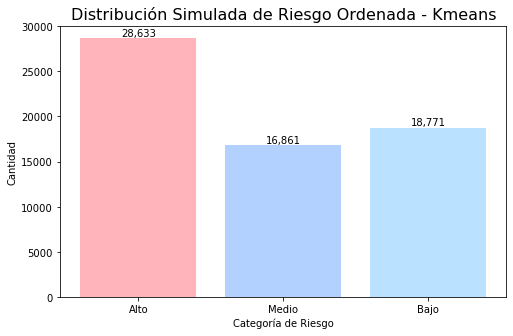

In [128]:
# Ordenar las categorías específicamente como 'Alto', 'Medio', 'Bajo'
categorias_ordenadas = ['Alto', 'Medio', 'Bajo']
conteos_ordenados = [distribucion_riesgo[categoria] for categoria in categorias_ordenadas]


colores_pastel = ['#FFB3BA', '#B3D1FF', '#BAE1FF']  # Rojo pastel, azul pastel y celeste pastel

# Crear el gráfico de barras con el orden deseado y colores pastel
plt.figure(figsize=(8, 5))
bars = plt.bar(categorias_ordenadas, conteos_ordenados, color=colores_pastel)
plt.title('Distribución Simulada de Riesgo Ordenada - Kmeans', fontsize=16)
plt.xlabel('Categoría de Riesgo')
plt.ylabel('Cantidad')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,}'.format(yval), ha='center', va='bottom')

plt.show()